In this project we dealt with the traditional problem of Regression, accompanied by several data engineering techniques like the management of categorical features, feature engineering, normalization, dimensionality reduction, and so on.

This project conducted by using the CarPrice_Assignment.csv dataset. It is a single CSV (Comma Separated Values) file that contains prices for 205 car models (samples).

The dataset contains 26 columns. The first column is car_ID and contains a unique car identifier. The last column contains the price of the model. The rest 24 columns represent other features which can be either numerical, or categorical.

## Task 1: Processing the dataset

In this task we perform some simple pre-processing operations on the given data. There are two sub-tasks in this task. More specifically:


### 1.1 Replace the column `CarName` by `CompanyName`.

`CompanyName` will contain the brand of the car. You will derive it by taking the first word of `CarName`. For example:
 * if `CarName='alfa-romero giulia'`, then `CompanyName='alfa-romero'`
 * if `CarName='audi 100ls'`, then `CompanyName='audi'`


In [ ]:
##Task 1.1 Solution

import pandas as pd
import numpy as np
import random

##Import Data
dataset= pd.read_csv("C:\\Users\\g1_ga\\OneDrive\\Desktop\\DATA SCIENCE\\MACHINE LEARNING CONCEPTS\\assesment\\CarPrice_Assignment.csv")

##Rename column CarName by CompanyName
dataset=dataset.rename(columns = {'CarName':'CompanyName'})

##Take the first word of Company Name
dataset["CompanyName"]=dataset["CompanyName"].str.split(" ",1).str[0]

### 1.2 Drop the `car_ID` column

After this process, the dataset must consist of 205 rows and 25 columns (24 features + 1 target variable).


In [ ]:
##Task 1.2 Solution

##Take out car ID column
dataset=dataset.drop(columns=["car_ID"])

##To see my data
dataset.head()

##To see information about data
dataset.info()

print(dataset)

#My dataset now consist: 205 rows x 25 columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CompanyName       205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

## Task 2: Feature engineering

The dataset contains both numerical and categorical features. There are five sub-tasks in this task. More specifically:


### 2.1. Dataset statistics

Report the minimum, maximum, and mean values for each numerical feature.



In [ ]:
##Task 2.1 Solution


##Find numerical features
numeric_features=dataset.select_dtypes(include=np.number).columns.tolist()
print(numeric_features)

##Calculculate min, max and mean for numerical feature
##Excluting symboling

statistics=dataset.agg({"wheelbase":["mean", "min", "max"],
                                      "carlength":["mean", "min", "max"],
                                      "carwidth":["mean", "min", "max"],
                                      "carheight":["mean", "min", "max"],
                                      "curbweight":["mean", "min", "max"],
                                      "enginesize":["mean", "min", "max"],
                                      "boreratio":["mean", "min", "max"],
                                      "stroke":["mean", "min", "max"],
                                      "compressionratio":["mean", "min", "max"],
                                      "horsepower":["mean", "min", "max"],
                                      "peakrpm":["mean", "min", "max"],
                                      "citympg":["mean", "min", "max"],
                                      "highwaympg":["mean", "min", "max"],
                                      "price":["mean", "min", "max"]})
print(statistics)

['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
       wheelbase   carlength   carwidth  carheight   curbweight  enginesize  \
mean   98.756585  174.049268  65.907805  53.724878  2555.565854  126.907317   
min    86.600000  141.100000  60.300000  47.800000  1488.000000   61.000000   
max   120.900000  208.100000  72.300000  59.800000  4066.000000  326.000000   

      boreratio    stroke  compressionratio  horsepower      peakrpm  \
mean   3.329756  3.255415         10.142537  104.117073  5125.121951   
min    2.540000  2.070000          7.000000   48.000000  4150.000000   
max    3.940000  4.170000         23.000000  288.000000  6600.000000   

        citympg  highwaympg         price  
mean  25.219512    30.75122  13276.710571  
min   13.000000    16.00000   5118.000000  
max   49.000000    54.00000  45400.000000  


### 2.2. How many missing values do we have per column?

Count the number of rows that have missing values per column.

In [ ]:
##Task 2.2 Solution

##Count of missing values in each column
print(dataset.isnull().sum())

symboling           0
CompanyName         0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


### 2.3. Correlation with the target variables (visual)

Study the correlation of each of the 24 features with the target variable (car price). More specifically:

* Create plots that illustrate the feature values against the target variable.
 * Regarding the numerical input variables, create scatter plots similar to the ones that were presented in the notebook about Linear Regression.
 * For the categorical features, you must compute the mean car prices per feature value. For example, the feature `fueltype` is categorical and the average price of the cars with
`diesel` is 15838.15, whereas the average price for cars with `gas` is 12999.7982. Then create the respective bar plots.

 This is what your figure/s must look like:

* Describe the general feeling on how the monotony of an input variable is correlated to the monotony of the target variable (e.g. by increasing the value of this feature the price of the car increases/decreases/is unaffected/is affected randomly, and so on).


In [ ]:
##Task 2.3 Solution

import matplotlib.pyplot as plt

##Study colleration between numerical features and target variable


Text(0, 0.5, 'Price')

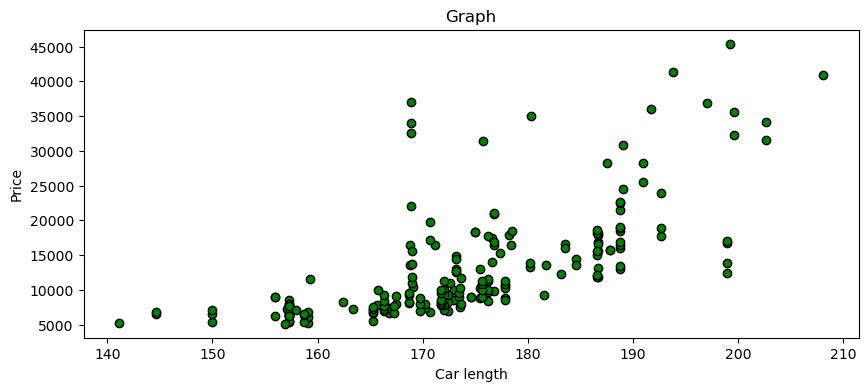

In [ ]:
##Plot car lenth feature VS the target variable (car price)

y=dataset.price
x=dataset.carlength

plt.figure(figsize=(10,4))

plt.scatter(x,y, c="green", edgecolor="black", linewidth=1)

plt.title("Graph")
plt.xlabel("Car length")
plt.ylabel("Price")

In [ ]:
##Comment: The target variable(price) increases as the car length increases.



Text(0, 0.5, 'Price')

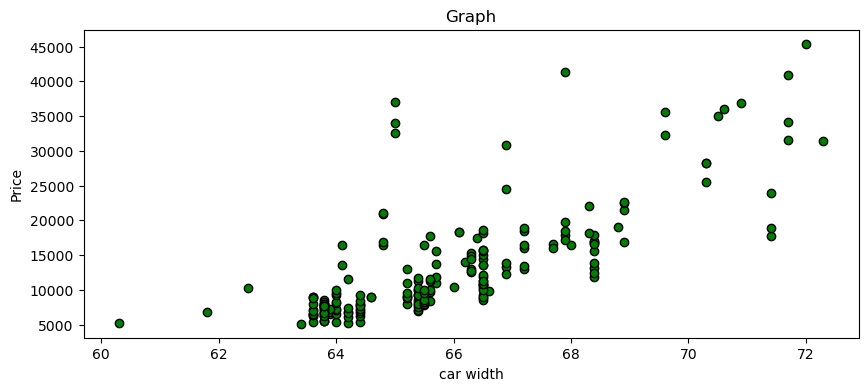

In [ ]:
##Plot carwidth feature VS the target variable (car price)

y=dataset.price
x=dataset.carwidth

plt.figure(figsize=(10,4))

plt.scatter(x,y, c="green", edgecolor="black", linewidth=1)

plt.title("Graph")
plt.xlabel("car width")
plt.ylabel("Price")

In [ ]:
##Comment: The target variable(price) increases as the car length increases.



Text(0, 0.5, 'Price')

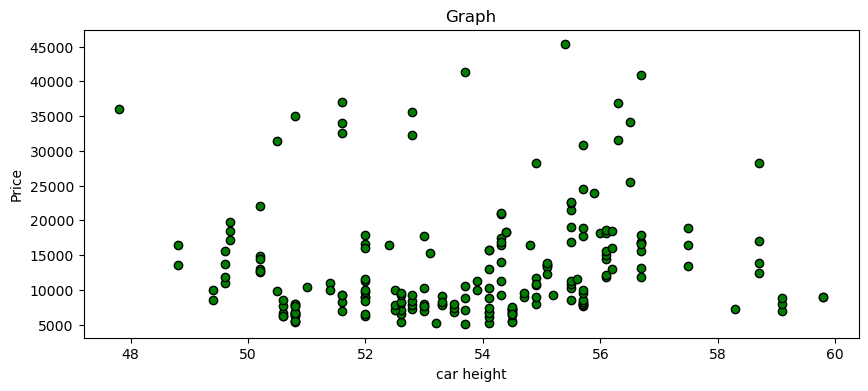

In [ ]:
##Plot carheight feature VS the target variable (car price)

y=dataset.price
x=dataset.carheight

plt.figure(figsize=(10,4))

plt.scatter(x,y, c="green", edgecolor="black", linewidth=1)

plt.title("Graph")
plt.xlabel("car height")
plt.ylabel("Price")

In [ ]:
##Comment: The target variable(price) is affected randomly as the car height increases.


Text(0, 0.5, 'Price')

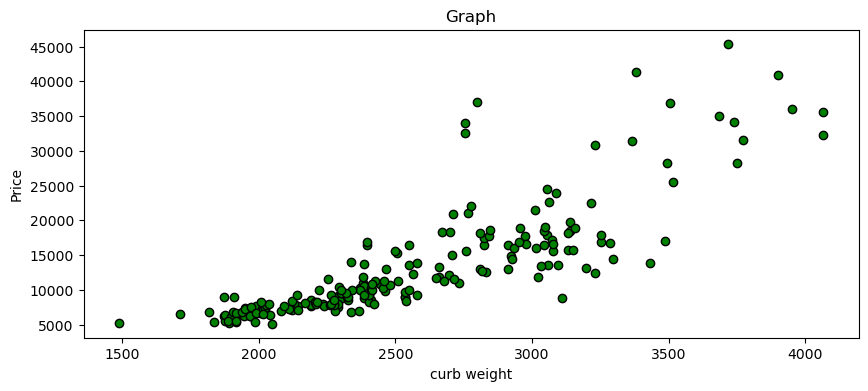

In [ ]:
##Plot curbweight feature VS the target variable (car price)

y=dataset.price
x=dataset.curbweight

plt.figure(figsize=(10,4))

plt.scatter(x,y, c="green", edgecolor="black", linewidth=1)

plt.title("Graph")
plt.xlabel("curb weight")
plt.ylabel("Price")

In [ ]:
##Comment: The target variable(price) increases as the cub weight increases.


Text(0, 0.5, 'Price')

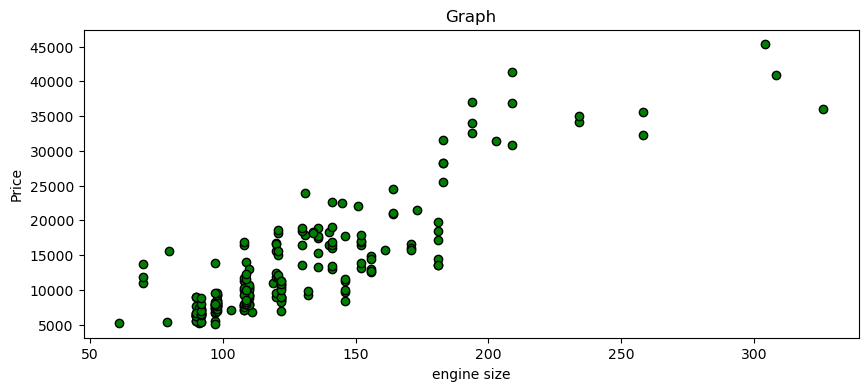

In [ ]:
##Plot enginesize feature VS the target variable (car price)

y=dataset.price
x=dataset.enginesize

plt.figure(figsize=(10,4))

plt.scatter(x,y, c="green", edgecolor="black", linewidth=1)

plt.title("Graph")
plt.xlabel("engine size")
plt.ylabel("Price")

In [ ]:
##Comment: The target variable(price) increases as the engine size increases.


Text(0, 0.5, 'Price')

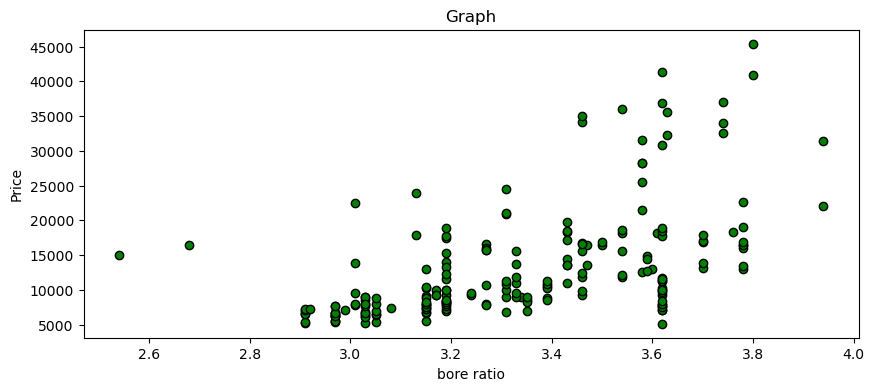

In [ ]:
##Plot boreratio feature VS the target variable (car price)

y=dataset.price
x=dataset.boreratio

plt.figure(figsize=(10,4))

plt.scatter(x,y, c="green", edgecolor="black", linewidth=1)

plt.title("Graph")
plt.xlabel("bore ratio")
plt.ylabel("Price")


In [ ]:
##Comment: The target variable(price) increases as the engine size increases but with some exceptions.


Text(0, 0.5, 'Price')

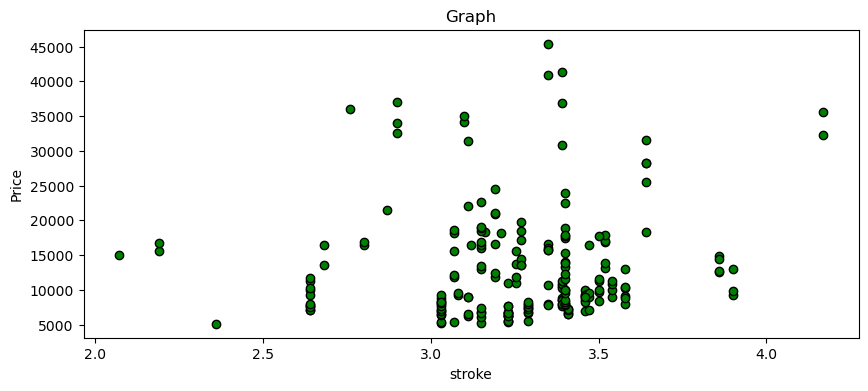

In [ ]:
##Plot stroke feature VS the target variable (car price)

y=dataset.price
x=dataset.stroke

plt.figure(figsize=(10,4))

plt.scatter(x,y, c="green", edgecolor="black", linewidth=1)

plt.title("Graph")
plt.xlabel("stroke")
plt.ylabel("Price")


In [ ]:
##Comment: The target variable(price) is affected randomly  as the engine size increases.


Text(0, 0.5, 'Price')

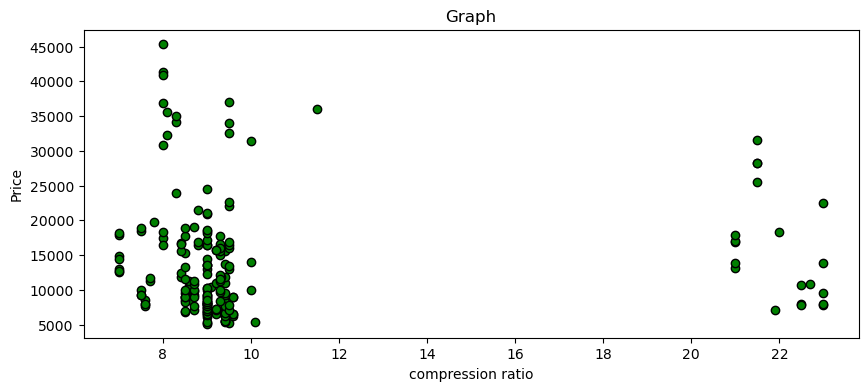

In [ ]:
##Plot compressionratio feature VS the target variable (car price)

y=dataset.price
x=dataset.compressionratio

plt.figure(figsize=(10,4))

plt.scatter(x,y, c="green", edgecolor="black", linewidth=1)

plt.title("Graph")
plt.xlabel("compression ratio")
plt.ylabel("Price")

In [ ]:
##Comment: The target variable(price) is unaffected from compression ratio.


Text(0, 0.5, 'Price')

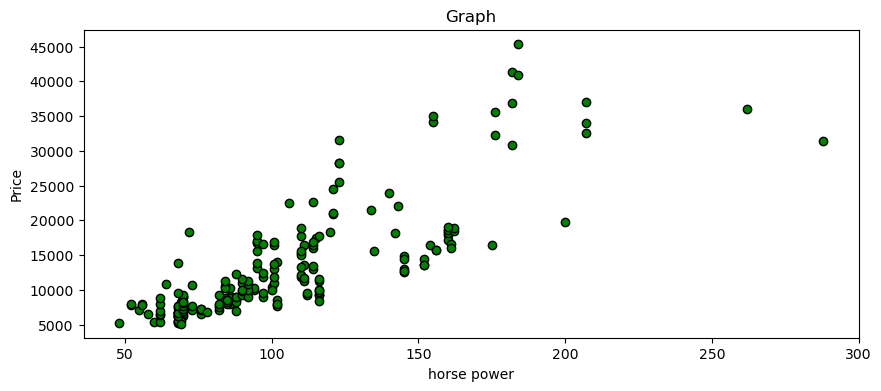

In [ ]:
##Plot horsepower feature VS the target variable (car price)

y=dataset.price
x=dataset.horsepower

plt.figure(figsize=(10,4))

plt.scatter(x,y, c="green", edgecolor="black", linewidth=1)

plt.title("Graph")
plt.xlabel("horse power")
plt.ylabel("Price")

In [ ]:
##Comment: The target variable(price) increases as the horse power increases.

Text(0, 0.5, 'Price')

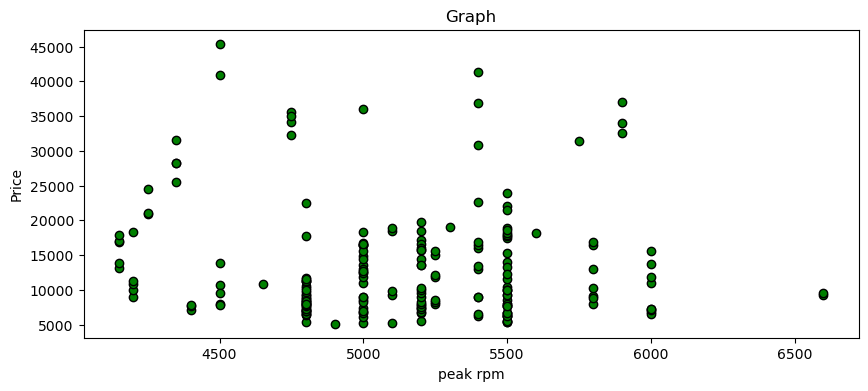

In [ ]:
##Plot peakrpm feature VS the target variable (car price)

y=dataset.price
x=dataset.peakrpm

plt.figure(figsize=(10,4))

plt.scatter(x,y, c="green", edgecolor="black", linewidth=1)

plt.title("Graph")
plt.xlabel("peak rpm")
plt.ylabel("Price")

In [ ]:
##Comment: The target variable(price) is affected randomly as the car peak rpm increases.


Text(0, 0.5, 'Price')

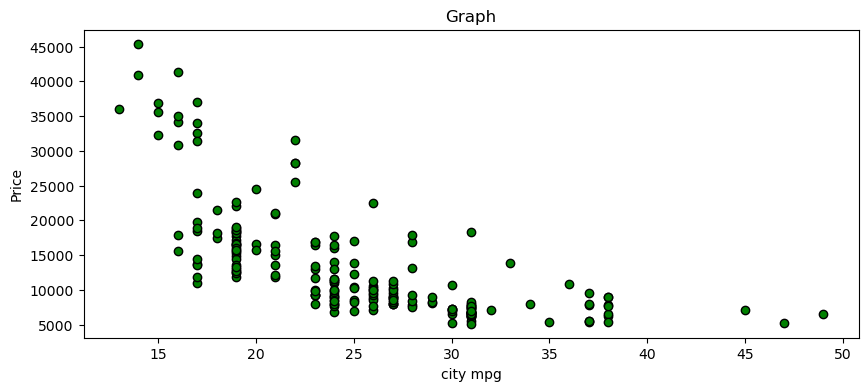

In [ ]:
##Plot citympg feature VS the target variable (car price)

y=dataset.price
x=dataset.citympg

plt.figure(figsize=(10,4))

plt.scatter(x,y, c="green", edgecolor="black", linewidth=1)

plt.title("Graph")
plt.xlabel("city mpg")
plt.ylabel("Price")

In [ ]:
##Comment: The target variable(price) is decreases as the car peak rpm increases.


Text(0, 0.5, 'Price')

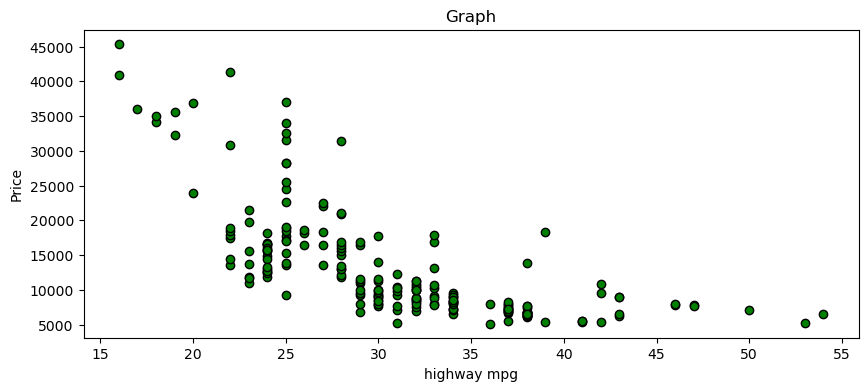

In [ ]:
##Plot highwaympg feature VS the target variable (car price)

y=dataset.price
x=dataset.highwaympg

plt.figure(figsize=(10,4))

plt.scatter(x,y, c="green", edgecolor="black", linewidth=1)

plt.title("Graph")
plt.xlabel("highway mpg")
plt.ylabel("Price")

In [ ]:
##Comment: The target variable(price) is decreases as the highway mpg increases.


In [ ]:


##Study colleration between numerical features and target variable

##Task 2.3 Solution * For the categorical features, you must compute the mean car prices per feature value. For example, the feature `fueltype` is categorical and the average price of the cars with

In [ ]:
##Task 2.3 Solution

##Calculate the mean price of categorical features

categorical_feature=dataset.loc[:, ["CompanyName","fueltype", "aspiration",
                                    "doornumber", "carbody", "drivewheel",
                                    "enginelocation","enginetype", "cylindernumber", "price",  "fuelsystem"]]
##print(categorical_feature)


Text(0.5, 0, 'Company Name')

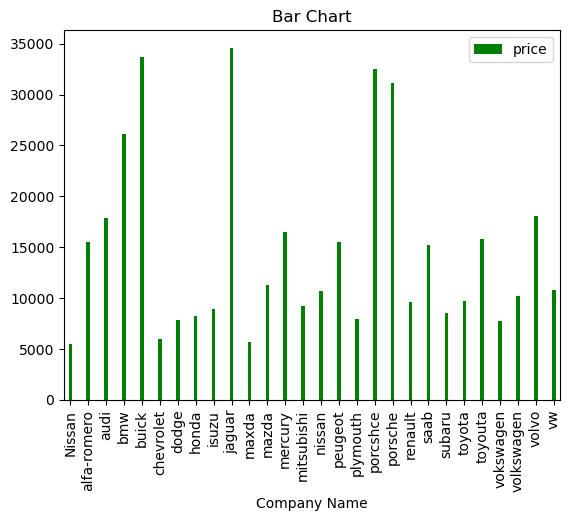

In [ ]:
##Plot CompanyName VS car price mean

CompanyName=categorical_feature.groupby("CompanyName").mean()
CompanyName.plot(kind='bar', color="green", width = 0.2)
plt.title("Bar Chart")
plt.xlabel("Company Name")


Text(0.5, 0, 'Fuel Type')

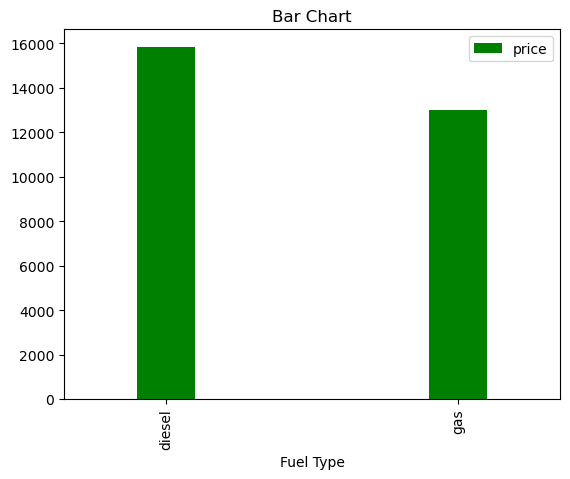

In [ ]:
##Plot fuel type VS car price mean

fueltype=categorical_feature.groupby("fueltype").mean()
fueltype.plot(kind='bar', color="green", width = 0.2)
plt.title("Bar Chart")
plt.xlabel("Fuel Type")


Text(0.5, 0, 'Aspiration')

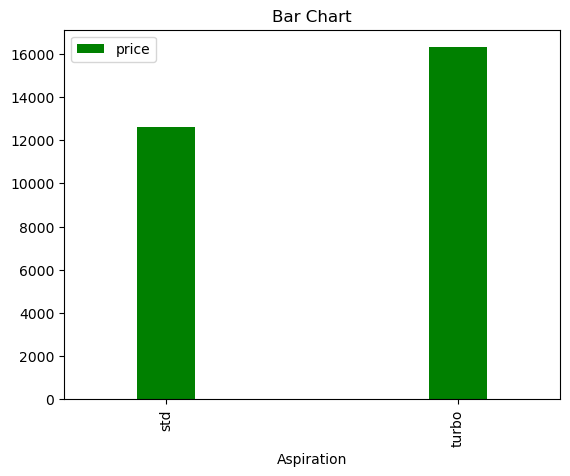

In [ ]:
##Plot aspiration VS car price mean

aspiration=categorical_feature.groupby("aspiration").mean()
aspiration.plot(kind='bar', color="green", width = 0.2)
plt.title("Bar Chart")
plt.xlabel("Aspiration")


Text(0.5, 0, 'Door number')

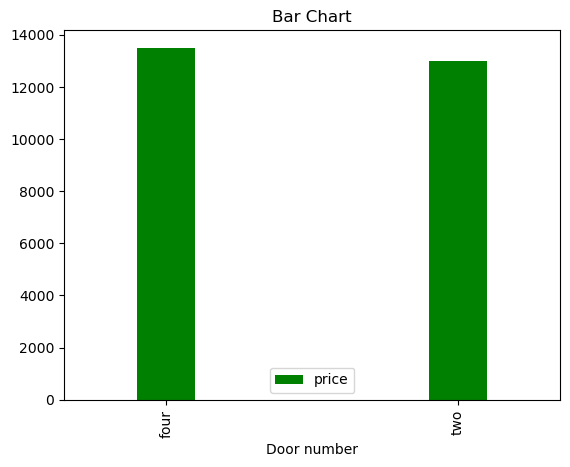

In [ ]:
##Plot doornumber VS car price mean
doornumber=categorical_feature.groupby("doornumber").mean()
doornumber.plot(kind='bar', color="green", width = 0.2)
plt.title("Bar Chart")
plt.xlabel("Door number")


Text(0.5, 0, 'Car Body')

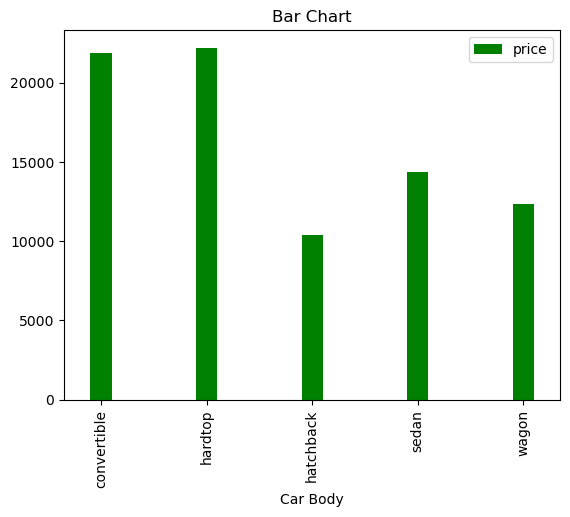

In [ ]:
##Plot carbody VS car price mean
carbody=categorical_feature.groupby("carbody").mean()
carbody.plot(kind='bar', color="green", width = 0.2)
plt.title("Bar Chart")
plt.xlabel("Car Body")

Text(0.5, 0, 'Engine Location')

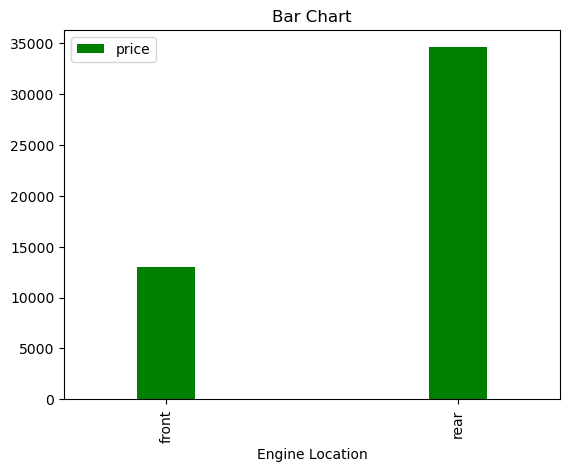

In [ ]:
#Plot enginelocation VS car price mean
enginelocation=categorical_feature.groupby("enginelocation").mean()
enginelocation.plot(kind='bar', color="green", width = 0.2)
plt.title("Bar Chart")
plt.xlabel("Engine Location")

Text(0.5, 0, 'Engine Type')

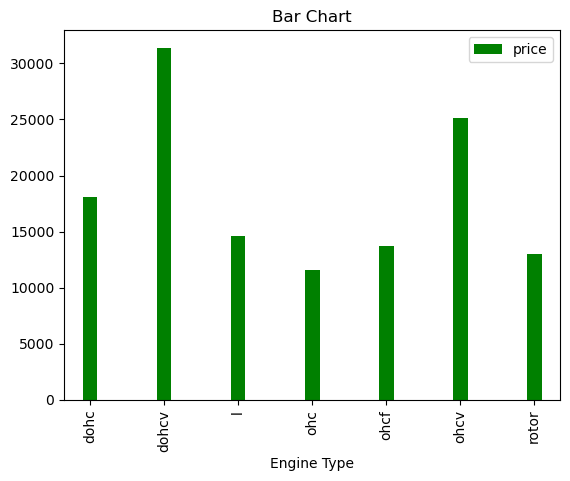

In [ ]:
##Plot enginetype VS car price mean
enginetype=categorical_feature.groupby("enginetype").mean()
enginetype.plot(kind='bar', color="green", width = 0.2)
plt.title("Bar Chart")
plt.xlabel("Engine Type")

Text(0.5, 0, 'Cylinder number')

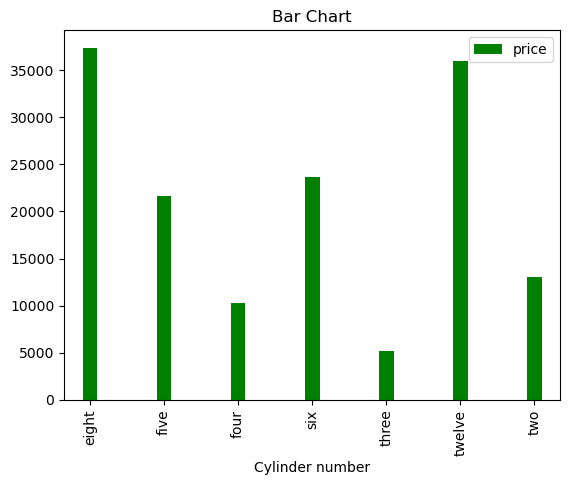

In [ ]:
##Plot cylindernumber VS car price mean
cylindernumber=categorical_feature.groupby("cylindernumber").mean()
cylindernumber.plot(kind='bar', color="green", width = 0.2)
plt.title("Bar Chart")
plt.xlabel("Cylinder number")


Text(0.5, 0, 'Fuel System')

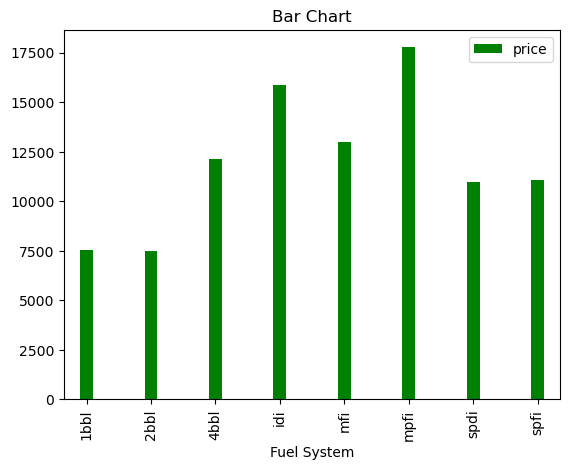

In [ ]:
#Plot fuelsystem VS car price mean
fuelsystem=categorical_feature.groupby("fuelsystem").mean()
fuelsystem.plot(kind='bar', color="green", width = 0.2)
plt.title("Bar Chart")
plt.xlabel("Fuel System")


### 2.4 Managing the categorical features

The existence of categorical features creates several problems, as the majority of data engineering and machine learning algorithms work only with numerical data. We can either drop the categorical features, or convert them to numerical ones.
Here are the two required actions:

* Drop the `CompanyName` feature, and
* Convert the categorical features to numerical by applying one-hot-encoding. As mentioned in the class, in one-hot-encoding the first value of each encoded feature is not required. So to reduce dimensionality, remove this first value from each one-hot-encoded feature.

  **Hint:** If you are managing the data with Pandas dataframes, use the `get_dummies` method with `drop_first=True`.

After this process, the shape of the dataset must be 205 rows and 44 columns.


In [ ]:
##Task 2.4 Solution

dataset.head()

##Remove CompanyName feature
dataset_new=dataset.drop(columns=["CompanyName"])

##Conver categorical featurew to numerical and remove the first value of each feature
dataset_new=pd.get_dummies(dataset_new, drop_first=True)

print(dataset_new)


     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0            3       88.6      168.8      64.1       48.8        2548   
1            3       88.6      168.8      64.1       48.8        2548   
2            1       94.5      171.2      65.5       52.4        2823   
3            2       99.8      176.6      66.2       54.3        2337   
4            2       99.4      176.6      66.4       54.3        2824   
..         ...        ...        ...       ...        ...         ...   
200         -1      109.1      188.8      68.9       55.5        2952   
201         -1      109.1      188.8      68.8       55.5        3049   
202         -1      109.1      188.8      68.9       55.5        3012   
203         -1      109.1      188.8      68.9       55.5        3217   
204         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio  stroke  compressionratio  ...  \
0           130       3.47    2.68               9.0  ...   
1

### 2.5 Correlation with the target variables (numerical)

This is an important process, as it indicates the features that are strongly correlated to the target variable. There are several ways of estimating this correlation.

* Compute the Pearson coefficient that quantifies the pairwise correlations of the dataset columns (including the target variable).

In [ ]:
##Task 2.5 Solution

import seaborn as sns

##Compute pearson coefficient
coorr_price=dataset_new.corr().round(2)
coorr_price

symboling  wheelbase  carlength  carwidth  carheight  \
symboling                   1.00      -0.53      -0.36     -0.23      -0.54   
wheelbase                  -0.53       1.00       0.87      0.80       0.59   
carlength                  -0.36       0.87       1.00      0.84       0.49   
carwidth                   -0.23       0.80       0.84      1.00       0.28   
carheight                  -0.54       0.59       0.49      0.28       1.00   
curbweight                 -0.23       0.78       0.88      0.87       0.30   
enginesize                 -0.11       0.57       0.68      0.74       0.07   
boreratio                  -0.13       0.49       0.61      0.56       0.17   
stroke                     -0.01       0.16       0.13      0.18      -0.06   
compressionratio           -0.18       0.25       0.16      0.18       0.26   
horsepower                  0.07       0.35       0.55      0.64      -0.11   
peakrpm                     0.27      -0.36      -0.29     -0.22      -0.32   
citympg                    -0.04      -0.47      -0.67     -0.64      -0.05   
highwaympg                  0.03      -0.54      -0.70     -0.68      -0.11   
price                      -0.08       0.58       0.68      0.76       0.12   
fueltype_gas                0.19      -0.31      -0.21     -0.23      -0.28   
aspiration_turbo           -0.06       0.26       0.23      0.30       0.09   
doornumber_two              0.66      -0.45      -0.40     -0.21      -0.55   
carbody_hardtop             0.17      -0.01       0.05      0.07      -0.07   
carbody_hatchback           0.44      -0.39      -0.44     -0.22      -0.48   
carbody_sedan              -0.38       0.29       0.27      0.15       0.24   
carbody_wagon              -0.30       0.21       0.22      0.06       0.46   
drivewheel_fwd              0.10      -0.46      -0.51     -0.47      -0.10   
drivewheel_rwd             -0.08       0.50       0.54      0.51       0.04   
enginelocation_rear         0.21      -0.19      -0.05     -0.05      -0.11   
enginetype_dohcv            0.01      -0.00       0.01      0.21      -0.09   
enginetype_l               -0.13       0.40       0.26      0.21       0.32   
enginetype_ohc             -0.08      -0.20      -0.27     -0.29       0.04   
enginetype_ohcf             0.04      -0.18      -0.12     -0.12      -0.05   
enginetype_ohcv            -0.01       0.17       0.24      0.35      -0.07   
enginetype_rotor            0.25      -0.08      -0.06     -0.01      -0.24   
cylindernumber_five        -0.09       0.26       0.26      0.40       0.15   
cylindernumber_four        -0.03      -0.31      -0.40     -0.52       0.06   
cylindernumber_six         -0.00       0.15       0.26      0.21      -0.05   
cylindernumber_three        0.07      -0.12      -0.19     -0.18      -0.02   
cylindernumber_twelve      -0.05       0.04       0.10      0.15      -0.17   
cylindernumber_two          0.25      -0.08      -0.06     -0.01      -0.24   
fuelsystem_2bbl            -0.03      -0.40      -0.49     -0.52      -0.08   
fuelsystem_4bbl             0.21      -0.07      -0.05     -0.01      -0.21   
fuelsystem_idi             -0.19       0.31       0.21      0.23       0.28   
fuelsystem_mfi              0.12      -0.03      -0.00      0.01      -0.10   
fuelsystem_mpfi             0.01       0.35       0.51      0.46       0.11   
fuelsystem_spdi             0.18      -0.12      -0.08     -0.05      -0.28   
fuelsystem_spfi             0.07      -0.03      -0.01     -0.02      -0.07   

                       curbweight  enginesize  boreratio  stroke  \
symboling                   -0.23       -0.11      -0.13   -0.01   
wheelbase                    0.78        0.57       0.49    0.16   
carlength                    0.88        0.68       0.61    0.13   
carwidth                     0.87        0.74       0.56    0.18   
carheight                    0.30        0.07       0.17   -0.06   
curbweight                   1.00        0.85       0.65   

* Identify the 8 features that have the strongest correlation with the target variable.

In [ ]:
##enginesize, curbweight, horsepower, carwidth, carlength, driverwheel_rwd, wheelbase, boreratio

* Create a heatmap of the pairwise feature correlations like the following one.

**Hint:** use the `seaborn` library.


AxesSubplot(0.125,0.11;0.62x0.77)


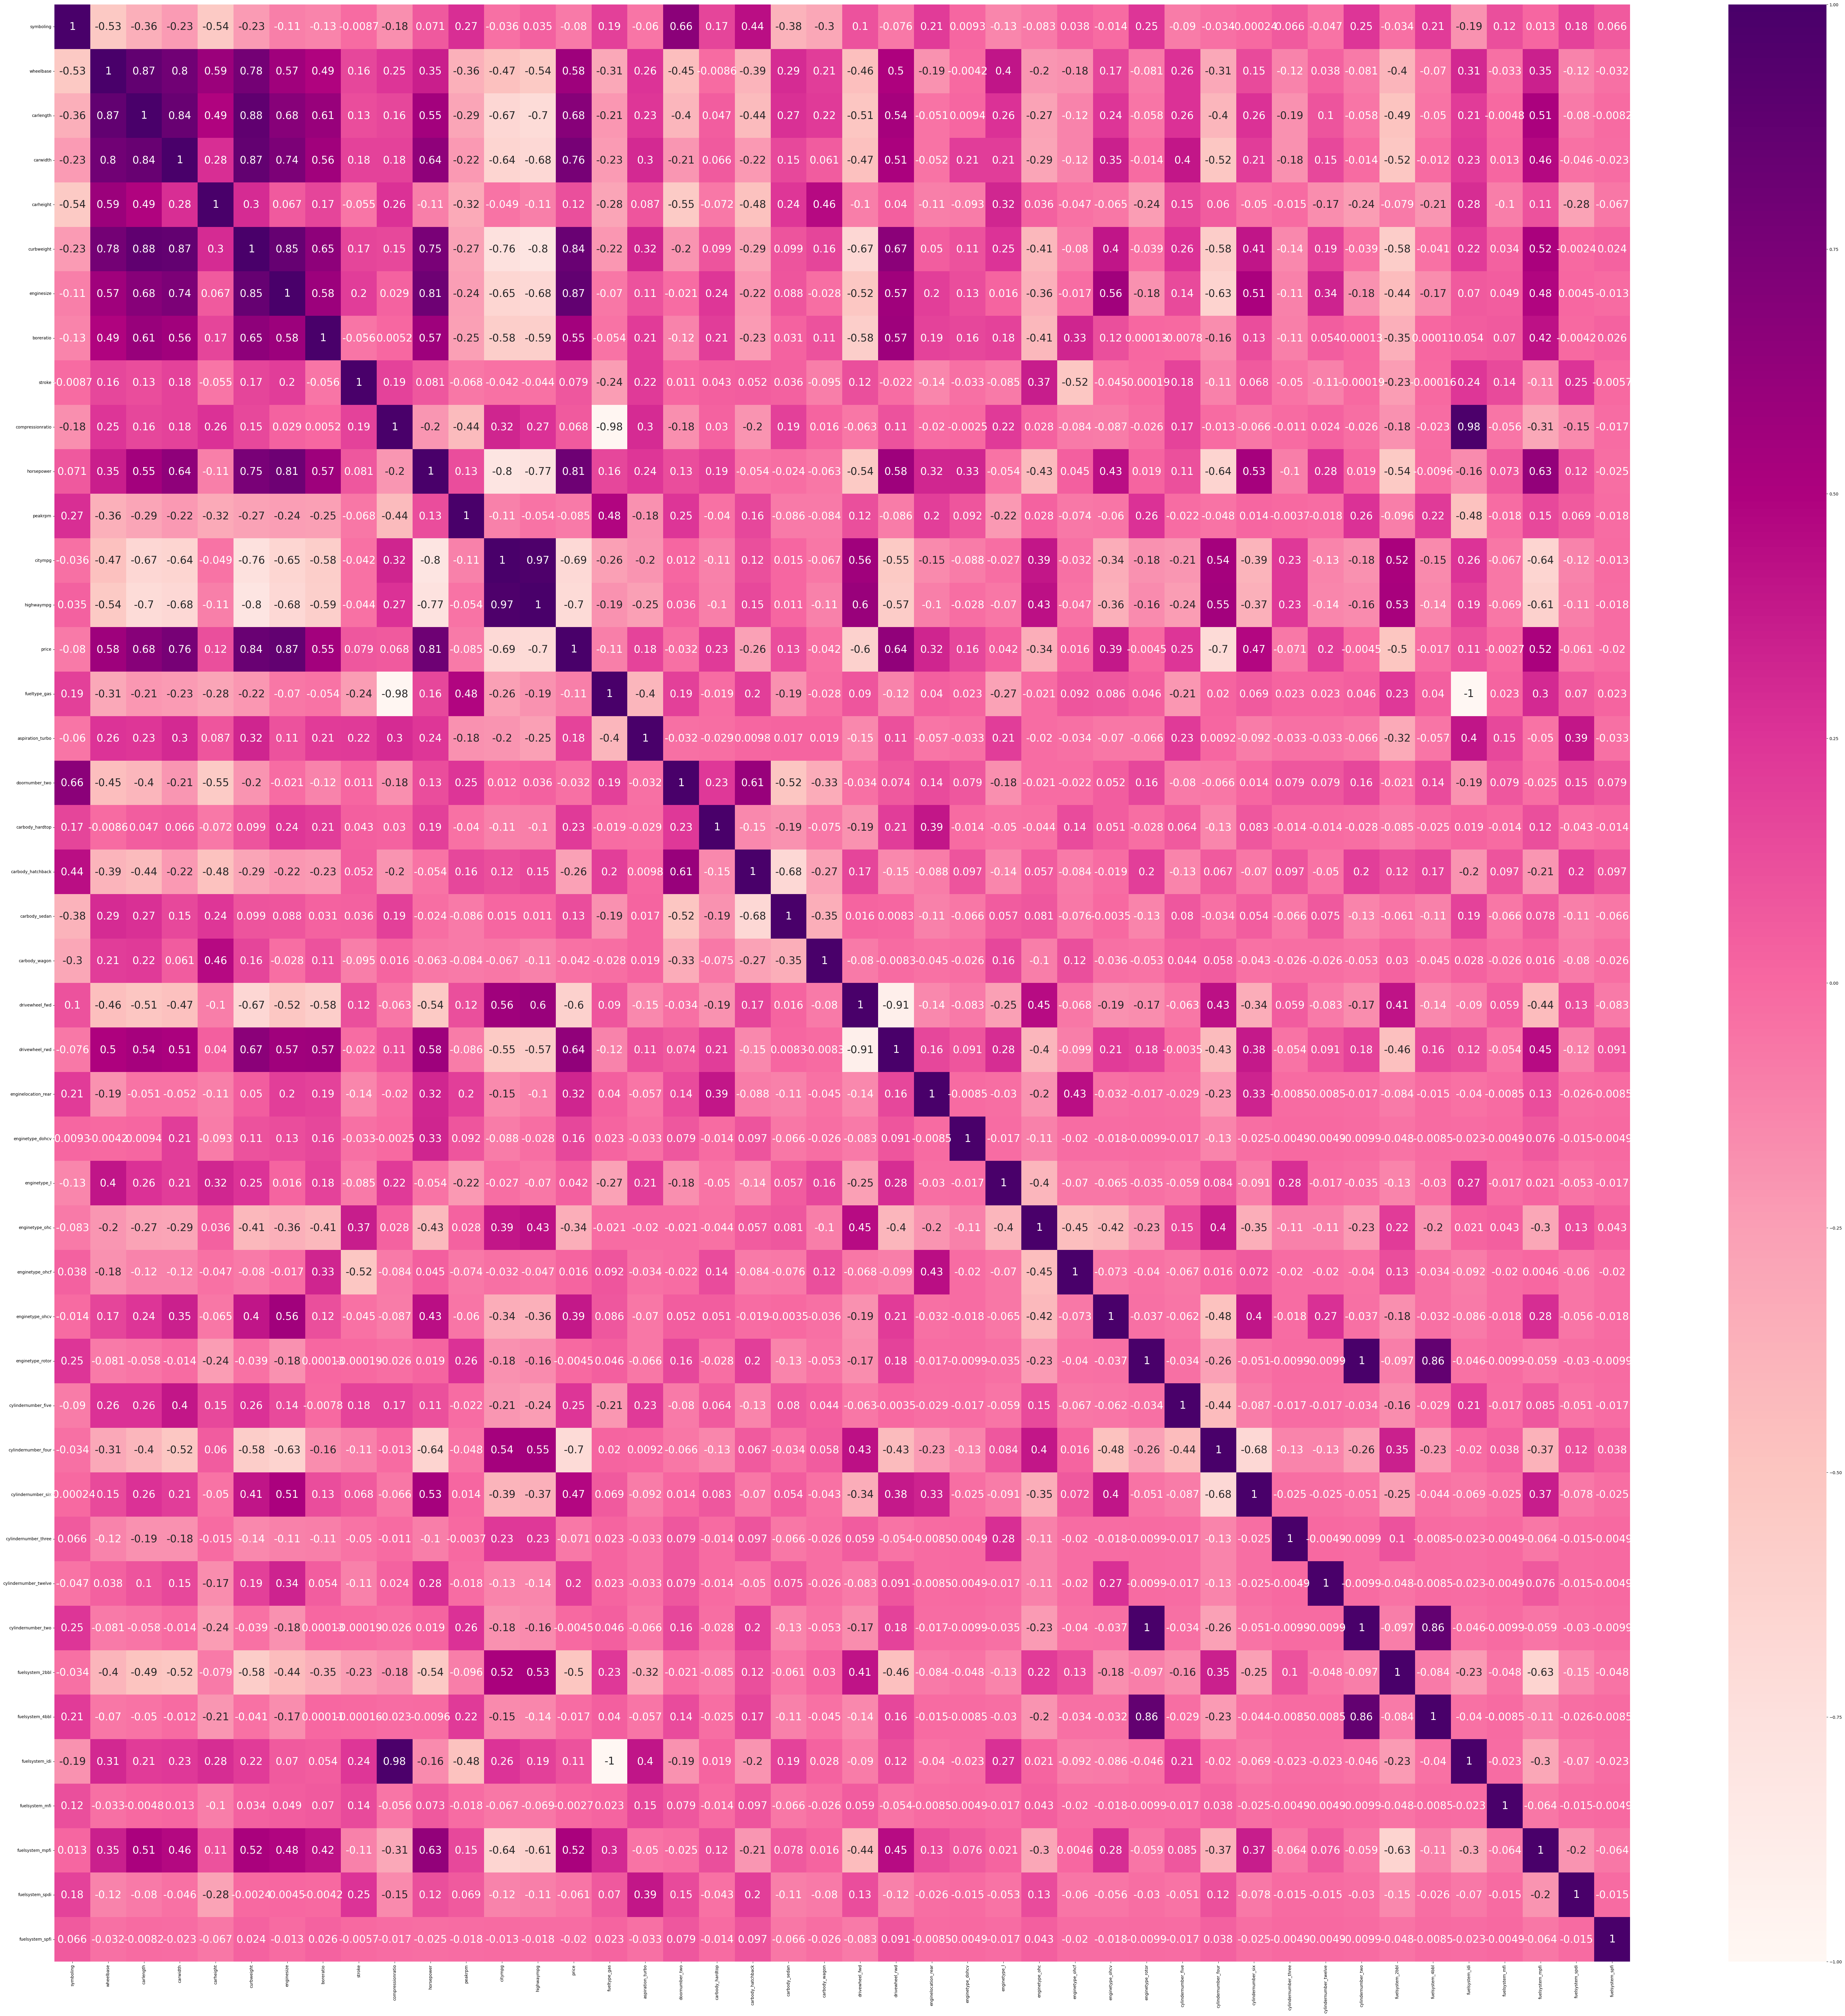

In [ ]:
plt.figure(figsize=(85, 85))

print(sns.heatmap(dataset_new.corr(), annot=True, annot_kws={'size': 25}, cmap="RdPu"))

# Task 3: Create a model to predict car prices

This is a typical Regression problem. You will experiment with the following scikit-learn algorithms:
* `LinearRegression`: Ordinary Least Squares Linear Regression.
* `Ridge`: Linear least squares with L2 regularization.
* `Lasso`: Linear Model trained with L1 prior as regularizer (aka the Lasso).
* `DecisionTreeRegressor`: Decision Tree for Regression problems.
* `RandomForestRegressor`: Random Forest for Regression problems.
* `MLPRegressor`: Multilayer Perceptron (feed-forward neural networks) for Regression problems.

Use 70% of the dataset for training and the rest 30% for testing.


In [ ]:
###Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
dataset_new

##Model Input / features
X=dataset_new.drop(labels=["price"], axis=1)
#print(X)

##the target variable, price
Y=dataset_new["price"]
#print(Y)

In [ ]:
random.seed=42
##Split the data into training and test sets
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST= train_test_split(X, Y, test_size=0.3,
                                                   random_state=1)


#print(X_TRAIN)
#print(X_TEST)
#print(Y_TRAIN)
#print(Y_TEST)

In [ ]:
##Create a linear regression model
LR_MODEL = LinearRegression()


##Fit the model to the training data
LR_MODEL.fit(X_TRAIN, Y_TRAIN)

##Make predictions on the test set
PREDICTIONS = LR_MODEL.predict(X_TEST)


##Calculate the mean squared error, R2, mean absolute error
MSE_1 = mean_squared_error(Y_TEST, PREDICTIONS)
R2_1 = LR_MODEL.score(X_TEST, Y_TEST)
MAE_1= mean_absolute_error(Y_TEST, PREDICTIONS)

##Print the coefficients
print("Mean Squared Error: ", MSE_1)
print("R-squared: ", R2_1)
print("Mean Absolute Error: ", MAE_1)

Mean Squared Error:  7229571.591283865
R-squared:  0.8802468550987081
Mean Absolute Error:  1836.8780560108596


Train the models by studying the effect of various hyper-parameters. Create a comparative table of Mean Squared Error, Mean Absolute Error, and R2 score for each algorithm. You must also present the results using bar plots (see the examples below).

**Note:** You will report only the best-performing results for each model. However, you must mention which settings you tried.

For example: <em>"We tried Decision Tree Regressor with max_depth=2, 3, 4, 5,... and we got the best results for max_depth=4. The results are..."</em>



In [ ]:
from sklearn.linear_model import Ridge

random.seed=42

# Create a Ridge regression model. For Ridge model I tried alpha =0.5, 0.05, 0.005, 0.0005 and I got the best results  for 0.00005.
RR_MODEL = Ridge(alpha=0.0005)

# Fit the model to the training data
RR_MODEL.fit(X_TRAIN, Y_TRAIN)

# Make predictions on the test set
PREDICTIONS_RR = RR_MODEL.predict(X_TEST)

# Calculate the mean squared error, R2, mean absolute error
MSE_2 = mean_squared_error(Y_TEST, PREDICTIONS_RR)
R2_2 = RR_MODEL.score(X_TEST, Y_TEST)
MAE_2= mean_absolute_error(Y_TEST, PREDICTIONS_RR)

# Print the coefficients
print("Mean Squared Error: ", MSE_2)
print("R-squared: ", R2_2)
print("Mean Absolute Error: ", MAE_2)

Mean Squared Error:  7230673.952250996
R-squared:  0.8802285952072383
Mean Absolute Error:  1836.9359286716385


In [ ]:
from sklearn.linear_model import Lasso

random.seed=42

# Create a Lasso regression model. For Ridge model I tried alpha =0.5, 0.05, 0.005, 0.0005 and I got the best results  for 0.00005.
LS_MODEL = Lasso(alpha=0.0005, max_iter=100000)

# Fit the model to the training data
LS_MODEL.fit(X_TRAIN, Y_TRAIN)

# Make predictions on the test set
PREDICTIONS_LS = LS_MODEL.predict(X_TEST)

# Calculate the mean squared error, R2, mean absolute error
MSE_3 = mean_squared_error(Y_TEST, PREDICTIONS_LS)
R2_3 = LS_MODEL.score(X_TEST, Y_TEST)
MAE_3 = mean_absolute_error(Y_TEST, PREDICTIONS_LS)

# Print the coefficients
print("Mean Squared Error: ", MSE_3)
print("R-squared: ", R2_3)
print("Mean Absolute Error: ", MAE_3)

Mean Squared Error:  7181528.85005178
R-squared:  0.8810426518177222
Mean Absolute Error:  1822.4615156559073


In [ ]:
from sklearn.tree import DecisionTreeRegressor

random.seed=42

# Create a desicion tree model. I tried Decision Tree Regressor with max_depth=2, 3, 4, 5, 6,7,8,9 and I got the best results for max_depth=8
DT_MODEL = DecisionTreeRegressor(max_depth=8)

# Fit the model to the training data
DT_MODEL.fit(X_TRAIN, Y_TRAIN)

# Make predictions on the test set
PREDICTIONS_DT = DT_MODEL.predict(X_TEST)

# Calculate the mean squared error, R2, mean absolute error
MSE_4 = mean_squared_error(Y_TEST, PREDICTIONS_DT)
R2_4 = DT_MODEL.score(X_TEST, Y_TEST)
MAE_4= mean_absolute_error(Y_TEST, PREDICTIONS_DT)

# Print the coefficients
print("Mean Squared Error: ", MSE_4)
print("R-squared: ", R2_4)
print("Mean Absolute Error: ", MAE_4)

Mean Squared Error:  6457212.388235681
R-squared:  0.8930404822715805
Mean Absolute Error:  1665.5797235023042


In [ ]:
from sklearn.ensemble import RandomForestRegressor

random.seed=42

# Create a desicion tree model
RF_MODEL = RandomForestRegressor(n_estimators=100)

# Fit the model to the training data
RF_MODEL.fit(X_TRAIN, Y_TRAIN)

# Make predictions on the test set
PREDICTIONS_RF = RF_MODEL.predict(X_TEST)

# Calculate the mean squared error, R2, mean absolute error
MSE_5 = mean_squared_error(Y_TEST, PREDICTIONS_RF)
R2_5 = RF_MODEL.score(X_TEST, Y_TEST)
MAE_5= mean_absolute_error(Y_TEST, PREDICTIONS_RF)

# Print the coefficients
print("Mean Squared Error: ", MSE_5)
print("R-squared: ", R2_5)
print("Mean Absolute Error: ", MAE_5)



Mean Squared Error:  4282025.5833552955
R-squared:  0.9290710350288512
Mean Absolute Error:  1322.3954049846388


In [ ]:
from sklearn.neural_network import MLPRegressor

random.seed=42

# Create a MLP model
MLP_MODEL = MLPRegressor(hidden_layer_sizes=(10,10), max_iter=10000, alpha=0.0005,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1)

# Fit the model to the training data
MLP_MODEL.fit(X_TRAIN, Y_TRAIN)

# Make predictions on the test set
PREDICTIONS_MLP = MLP_MODEL.predict(X_TEST)

# Calculate the mean squared error, R2, mean absolute error
MSE_6 = mean_squared_error(Y_TEST, PREDICTIONS_MLP)
R2_6 = MLP_MODEL.score(X_TEST, Y_TEST)
MAE_6 = mean_absolute_error(Y_TEST, PREDICTIONS_MLP)

# Print the coefficients
print("Mean Squared Error: ", MSE_6)
print("R-squared: ", R2_6)
print("Mean Absolute Error: ", MAE_6)

Iteration 1, loss = 129143215.59128857
Iteration 2, loss = 2896090737625944049700090937344.00000000
Iteration 3, loss = 121025294417878793484142868442606835838749962676310125024909459456.00000000
Iteration 4, loss = 2436838311058958156689196729704449155389295998595288088570117205642483152715776.00000000
Iteration 5, loss = 4957447111782818194595753713639991914784905838869543538685270456104932742266880.00000000
Iteration 6, loss = 7983325823686326118511867798028901468780154178564271766452463248029537452163072.00000000
Iteration 7, loss = 11320054551135970791361892775243412942426162595483041333887175012206133330837504.00000000
Iteration 8, loss = 14819995032893729445605432042421643286881752293378022474492508322291233920647168.00000000
Iteration 9, loss = 18372417947522207094254974485286484106742735997597050903914871528153756928573440.00000000
Iteration 10, loss = 21895604448907039487879603383820406007618224320020518666286470985852760084185088.00000000
Iteration 11, loss = 253305369864098

   Mean Squared Error     R-squared  Mean Absolute Error  \
0        7.229572e+06  8.802469e-01         1.836878e+03   
1        7.230674e+06  8.802286e-01         1.836936e+03   
2        7.181529e+06  8.810427e-01         1.822462e+03   
3        6.457212e+06  8.930405e-01         1.665580e+03   
4        4.282026e+06  9.290710e-01         1.322395e+03   
5        1.087021e+61 -1.800579e+53         3.297000e+30   

              Classifier  
0      Linear Regression  
1       Ridge Regression  
2       Lasso Regression  
3          Decision Tree  
4          Random Forest  
5  Multilayer Perceptron  


<AxesSubplot:xlabel='Classifier'>

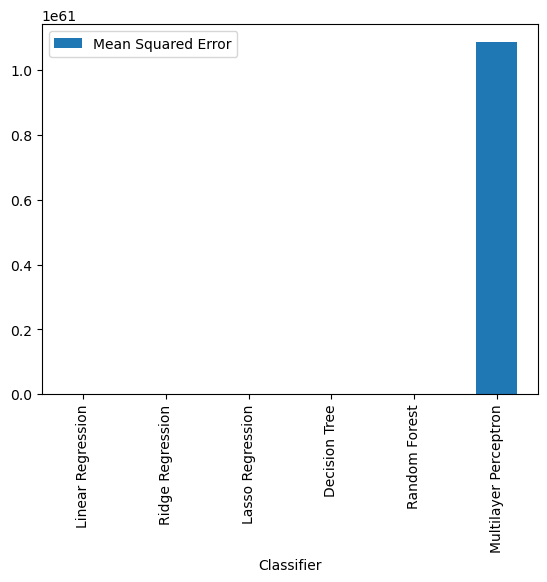

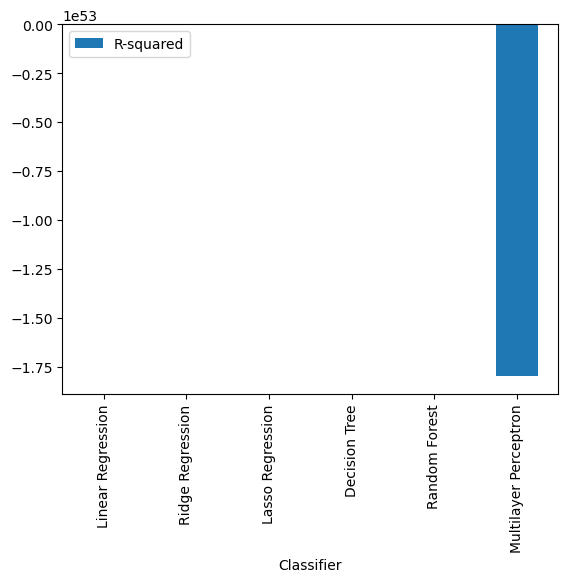

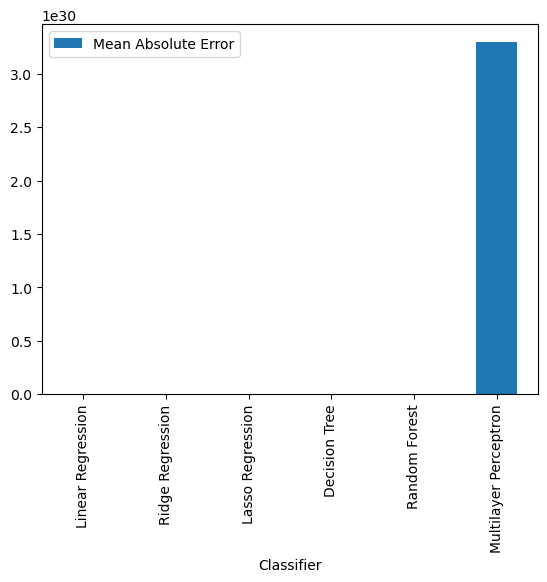

In [ ]:
#Plot CompanyName VS car price mean
#CompanyName=categorical_feature.groupby("CompanyName").mean()
#CompanyName.plot(kind='bar', color="green", width = 0.2)
import pandas as pd

metrics = {"Mean Squared Error": [MSE_1, MSE_2, MSE_3, MSE_4, MSE_5, MSE_6],
          "R-squared": [R2_1, R2_2, R2_3, R2_4, R2_5, R2_6],
           "Mean Absolute Error": [MAE_1, MAE_2, MAE_3, MAE_4, MAE_5, MAE_6]}
#print(metrics)

table=pd.DataFrame(metrics)

#print(Table_for_metrics)

Classifier=["Linear Regression", "Ridge Regression", "Lasso Regression", "Decision Tree", "Random Forest", "Multilayer Perceptron"]

table["Classifier"]= Classifier

print(table)


#tableTable_for_metrics.Mean Squared Error
#Table_for_metrics.plot(kind='bar', color="green", width = 0.2)
table.plot.bar(x="Classifier", y="Mean Squared Error")
table.plot.bar(x="Classifier", y="R-squared")
table.plot.bar(x="Classifier", y="Mean Absolute Error")



# Task 4: Standardization

Standardize the data and repeat all the experiments **by using the same hyper-parameters for the models**. Again, report the values of Mean Squared Error, Mean Absolute Error, and R2 score.

Compare the performance of the models and discuss your conclusions. How do the models compare when they operate on standardized and non-standardized data?

In [ ]:
##As it can be seen, in non-standardized data it is challenginig to evaluate the performance of the models. Since, the feactures it is in original size, have different units of measurement. Some features large values obsess others.

##On the other hand, in standardized data its easier to compare the performance of the models as all the input features are on the same scale. In standardrised data models can be treat all the variables in the same way.

##Regarding models on standardized data, as shown below in the bar chart, best performance has the "Random Forest" model(r-squared=0.93).
##In contrast "Multilayer Perceptron" model has the lowest r-squared, 0.80.


In [ ]:
##print(dataset_new)

In [ ]:
#Task 4 solution

#Standardized the dataset

from sklearn.preprocessing import StandardScaler

random.seed=42

scaler=StandardScaler()
dataset_scaled= pd.DataFrame(scaler.fit_transform(dataset_new))


In [ ]:
#Rename columns name
dataset_scaled.columns=dataset_new.columns


print(dataset_scaled)

     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0     1.743470  -1.690772  -0.426521 -0.844782  -2.020417   -0.014566   
1     1.743470  -1.690772  -0.426521 -0.844782  -2.020417   -0.014566   
2     0.133509  -0.708596  -0.231513 -0.190566  -0.543527    0.514882   
3     0.938490   0.173698   0.207256  0.136542   0.235942   -0.420797   
4     0.938490   0.107110   0.207256  0.230001   0.235942    0.516807   
..         ...        ...        ...       ...        ...         ...   
200  -1.476452   1.721873   1.198549  1.398245   0.728239    0.763241   
201  -1.476452   1.721873   1.198549  1.351515   0.728239    0.949992   
202  -1.476452   1.721873   1.198549  1.398245   0.728239    0.878757   
203  -1.476452   1.721873   1.198549  1.398245   0.728239    1.273437   
204  -1.476452   1.721873   1.198549  1.398245   0.728239    0.975021   

     enginesize  boreratio    stroke  compressionratio  ...  \
0      0.074449   0.519071 -1.839377         -0.288349  ... 

In [ ]:
dataset_scaled

##features
X=dataset_scaled.drop(labels=["price"], axis=1)
#print(X)


##the target variable, price
Y=dataset_scaled["price"]
#print(Y)

In [ ]:
random.seed=42

##Split the data into training and test sets
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST= train_test_split(X, Y, test_size=0.3,
                                                   random_state=1)


#print(X_TRAIN)
#print(X_TEST)
#print(Y_TRAIN)
#print(Y_TEST)

In [ ]:
##Create a linear regression model
LR_MODEL = LinearRegression()


##Fit the model to the training data
LR_MODEL.fit(X_TRAIN, Y_TRAIN)

##Make predictions on the test set
PREDICTIONS = LR_MODEL.predict(X_TEST)


##Calculate the mean squared error, R2, mean absolute error
MSE_1 = mean_squared_error(Y_TEST, PREDICTIONS)
R2_1 = LR_MODEL.score(X_TEST, Y_TEST)
MAE_1= mean_absolute_error(Y_TEST, PREDICTIONS)

##Print the coefficients
print("Mean Squared Error: ", MSE_1)
print("R-squared: ", R2_1)
print("Mean Absolute Error: ", MAE_1)

Mean Squared Error:  0.11402917612819033
R-squared:  0.8800402795931853
Mean Absolute Error:  0.23084838522057669


Train the models by studying the effect of various hyper-parameters. Create a comparative table of Mean Squared Error, Mean Absolute Error, and R2 score for each algorithm. You must also present the results using bar plots (see the examples below).

**Note:** You will report only the best-performing results for each model. However, you must mention which settings you tried.

For example: <em>"We tried Decision Tree Regressor with max_depth=2, 3, 4, 5,... and we got the best results for max_depth=4. The results are..."</em>



In [ ]:
from sklearn.linear_model import Ridge

random.seed=42

# Create a Ridge regression model. For Ridge model I tried alpha =0.5, 0.05, 0.005, 0.0005 and I got the best results  for 0.00005.
RR_MODEL = Ridge(alpha=0.0005)

# Fit the model to the training data
RR_MODEL.fit(X_TRAIN, Y_TRAIN)

# Make predictions on the test set
PREDICTIONS_RR = RR_MODEL.predict(X_TEST)

# Calculate the mean squared error, R2, mean absolute error
MSE_2 = mean_squared_error(Y_TEST, PREDICTIONS_RR)
R2_2 = RR_MODEL.score(X_TEST, Y_TEST)
MAE_2= mean_absolute_error(Y_TEST, PREDICTIONS_RR)

# Print the coefficients
print("Mean Squared Error: ", MSE_2)
print("R-squared: ", R2_2)
print("Mean Absolute Error: ", MAE_2)

Mean Squared Error:  0.11402668255576863
R-squared:  0.8800429028538339
Mean Absolute Error:  0.23083632362946638


In [ ]:
from sklearn.linear_model import Lasso

random.seed=42

# Create a Lasso regression model. For Ridge model I tried alpha =0.5, 0.05, 0.005, 0.0005 and I got the best results  for 0.00005.
LS_MODEL = Lasso(alpha=0.0005, max_iter=100000)

# Fit the model to the training data
LS_MODEL.fit(X_TRAIN, Y_TRAIN)

# Make predictions on the test set
PREDICTIONS_LS = LS_MODEL.predict(X_TEST)

# Calculate the mean squared error, R2, mean absolute error
MSE_3 = mean_squared_error(Y_TEST, PREDICTIONS_LS)
R2_3 = LS_MODEL.score(X_TEST, Y_TEST)
MAE_3 = mean_absolute_error(Y_TEST, PREDICTIONS_LS)

# Print the coefficients
print("Mean Squared Error: ", MSE_3)
print("R-squared: ", R2_3)
print("Mean Absolute Error: ", MAE_3)

Mean Squared Error:  0.12042954471846164
R-squared:  0.873307034184779
Mean Absolute Error:  0.23412006157866766


In [ ]:
from sklearn.tree import DecisionTreeRegressor

random.seed=42

# Create a desicion tree model. I tried Decision Tree Regressor with max_depth=2, 3, 4, 5, 6,7,8,9 and I got the best results for max_depth=8
DT_MODEL = DecisionTreeRegressor(max_depth=8)

# Fit the model to the training data
DT_MODEL.fit(X_TRAIN, Y_TRAIN)

# Make predictions on the test set
PREDICTIONS_DT = DT_MODEL.predict(X_TEST)

# Calculate the mean squared error, R2, mean absolute error
MSE_4 = mean_squared_error(Y_TEST, PREDICTIONS_DT)
R2_4 = DT_MODEL.score(X_TEST, Y_TEST)
MAE_4= mean_absolute_error(Y_TEST, PREDICTIONS_DT)

# Print the coefficients
print("Mean Squared Error: ", MSE_4)
print("R-squared: ", R2_4)
print("Mean Absolute Error: ", MAE_4)

Mean Squared Error:  0.09222123480895224
R-squared:  0.9029824302964673
Mean Absolute Error:  0.1965377068477037


In [ ]:
from sklearn.ensemble import RandomForestRegressor

random.seed=42

# Create a desicion tree model
RF_MODEL = RandomForestRegressor(n_estimators=100)

# Fit the model to the training data
RF_MODEL.fit(X_TRAIN, Y_TRAIN)

# Make predictions on the test set
PREDICTIONS_RF = RF_MODEL.predict(X_TEST)

# Calculate the mean squared error, R2, mean absolute error
MSE_5 = mean_squared_error(Y_TEST, PREDICTIONS_RF)
R2_5 = RF_MODEL.score(X_TEST, Y_TEST)
MAE_5= mean_absolute_error(Y_TEST, PREDICTIONS_RF)

# Print the coefficients
print("Mean Squared Error: ", MSE_5)
print("R-squared: ", R2_5)
print("Mean Absolute Error: ", MAE_5)



Mean Squared Error:  0.06657986224176442
R-squared:  0.9299573852022968
Mean Absolute Error:  0.1678700922076662


In [ ]:
from sklearn.neural_network import MLPRegressor

random.seed=42

# Create a MLP model
MLP_MODEL = MLPRegressor(hidden_layer_sizes=(10,10), max_iter=10000, alpha=0.0005,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1)

# Fit the model to the training data
MLP_MODEL.fit(X_TRAIN, Y_TRAIN)

# Make predictions on the test set
PREDICTIONS_MLP = MLP_MODEL.predict(X_TEST)

# Calculate the mean squared error, R2, mean absolute error
MSE_6 = mean_squared_error(Y_TEST, PREDICTIONS_MLP)
R2_6 = MLP_MODEL.score(X_TEST, Y_TEST)
MAE_6 = mean_absolute_error(Y_TEST, PREDICTIONS_MLP)

# Print the coefficients
print("Mean Squared Error: ", MSE_6)
print("R-squared: ", R2_6)
print("Mean Absolute Error: ", MAE_6)

Iteration 1, loss = 1.32920361
Iteration 2, loss = 1.29822792
Iteration 3, loss = 1.25570477
Iteration 4, loss = 1.20435761
Iteration 5, loss = 1.14692327
Iteration 6, loss = 1.08598258
Iteration 7, loss = 1.02309931
Iteration 8, loss = 0.96000354
Iteration 9, loss = 0.89802062
Iteration 10, loss = 0.83827658
Iteration 11, loss = 0.78138274
Iteration 12, loss = 0.72792094
Iteration 13, loss = 0.67832895
Iteration 14, loss = 0.63283991
Iteration 15, loss = 0.59154016
Iteration 16, loss = 0.55436364
Iteration 17, loss = 0.52107130
Iteration 18, loss = 0.49144142
Iteration 19, loss = 0.46508758
Iteration 20, loss = 0.44179962
Iteration 21, loss = 0.42157926
Iteration 22, loss = 0.40411260
Iteration 23, loss = 0.38922606
Iteration 24, loss = 0.37667298
Iteration 25, loss = 0.36597880
Iteration 26, loss = 0.35683799
Iteration 27, loss = 0.34903995
Iteration 28, loss = 0.34244293
Iteration 29, loss = 0.33679011
Iteration 30, loss = 0.33192869
Iteration 31, loss = 0.32768159
Iteration 32, los

Iteration 365, loss = 0.06177520
Iteration 366, loss = 0.06167202
Iteration 367, loss = 0.06156928
Iteration 368, loss = 0.06146690
Iteration 369, loss = 0.06136497
Iteration 370, loss = 0.06126363
Iteration 371, loss = 0.06116263
Iteration 372, loss = 0.06106206
Iteration 373, loss = 0.06096190
Iteration 374, loss = 0.06086244
Iteration 375, loss = 0.06076331
Iteration 376, loss = 0.06066466
Iteration 377, loss = 0.06056641
Iteration 378, loss = 0.06046866
Iteration 379, loss = 0.06037123
Iteration 380, loss = 0.06027416
Iteration 381, loss = 0.06017746
Iteration 382, loss = 0.06008110
Iteration 383, loss = 0.05998540
Iteration 384, loss = 0.05988962
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Mean Squared Error:  0.18976565178574328
R-squared:  0.8003648250037042
Mean Absolute Error:  0.31284710715675534


   Mean Squared Error  R-squared  Mean Absolute Error             Classifier
0            0.114029   0.880040             0.230848      Linear Regression
1            0.114027   0.880043             0.230836       Ridge Regression
2            0.120430   0.873307             0.234120       Lasso Regression
3            0.092221   0.902982             0.196538          Decision Tree
4            0.066580   0.929957             0.167870          Random Forest
5            0.189766   0.800365             0.312847  Multilayer Perceptron


<AxesSubplot:xlabel='Classifier'>

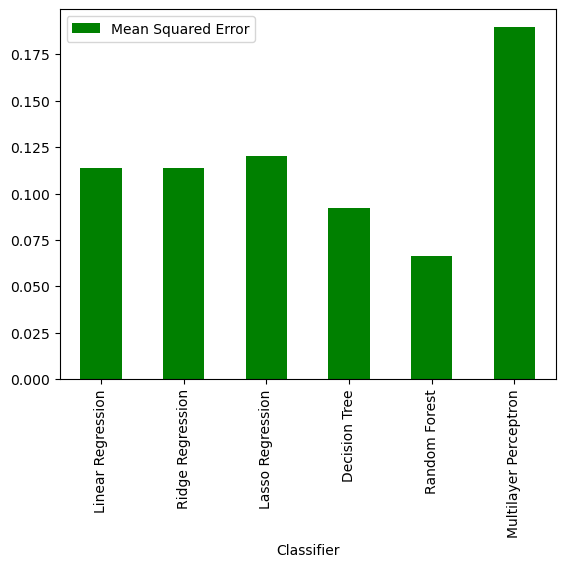

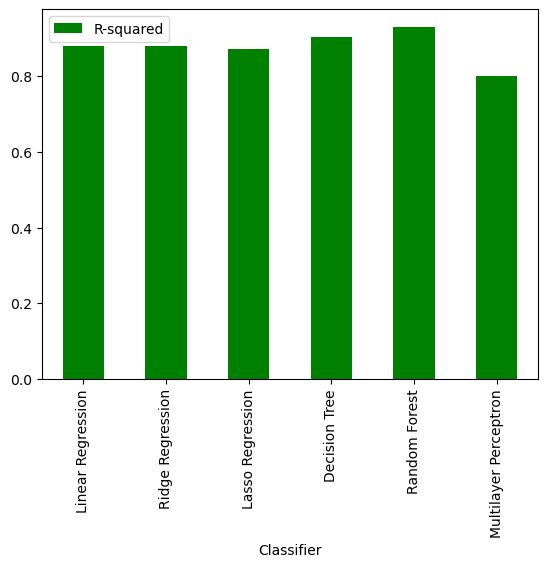

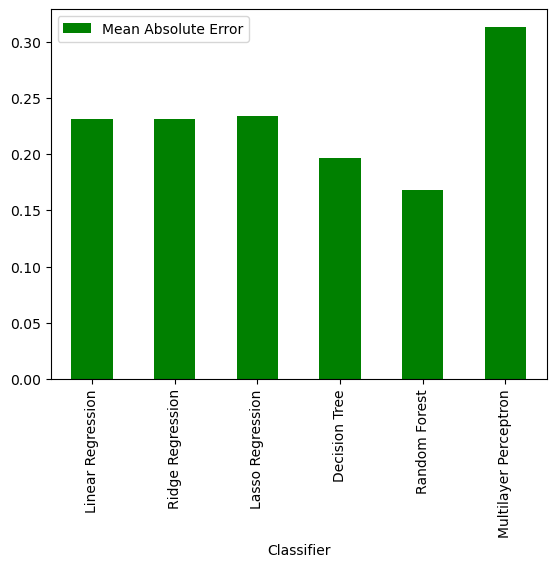

In [ ]:
metrics = {"Mean Squared Error": [MSE_1, MSE_2, MSE_3, MSE_4, MSE_5, MSE_6],
          "R-squared": [R2_1, R2_2, R2_3, R2_4, R2_5, R2_6],
           "Mean Absolute Error": [MAE_1, MAE_2, MAE_3, MAE_4, MAE_5, MAE_6]}
#print(metrics)

table=pd.DataFrame(metrics)

#print(Table_for_metrics)

Classifier=["Linear Regression", "Ridge Regression", "Lasso Regression", "Decision Tree", "Random Forest", "Multilayer Perceptron"]

table["Classifier"]= Classifier

print(table)


#tableTable_for_metrics.Mean Squared Error
#Table_for_metrics.plot(kind='bar', color="green", width = 0.2)

table.plot.bar(x="Classifier", y="Mean Squared Error", color="green")
table.plot.bar(x="Classifier", y="R-squared", color="green")
table.plot.bar(x="Classifier", y="Mean Absolute Error", color="green")

# Task 5: Dimensionality Reduction

In this task you will study the effect of dimensionality reduction in the performance of our regression models. More specifically, you will create a **new target space with 8 dimensions** by applying the following two techniques **on the standardized data**.

* Principle Component Analysis (PCA) with 8 target variables.
* Manually keep the best 8 features that derived from task 2.5. These are the 8 features that achieved the highest Pearson coefficient values with the target variable.

Compare the performance of the models on the reduced dimensional space against the original dimensional space. Discuss the results.


In [ ]:
## As you can seen in the bar chart bellow, dimensional reduction had a positive impact in the performance of the models.
## The performance of the models improve since dimensional reduction remove noise and irrelevant variables.

In [ ]:
from sklearn.decomposition import PCA

##Task 5 solution
##Principle Component Analysis (PCA) with 8 target variables
pca = PCA(n_components=8)
pca.fit(dataset_scaled)
data_pca = pca.transform(dataset_scaled)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
data_pca.head()

data_pca.shape

print(data_pca)


          PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    0.222552  2.669302 -0.033935  0.268525  1.718009  0.878082  0.341184   
1    0.324684  2.684972 -0.034169  0.234896  1.741994  0.835168  0.320363   
2    2.395916  3.086148  0.029777 -1.402123  0.807004 -2.162026  2.876903   
3   -0.466915 -0.185447 -0.860766 -0.059777 -1.408754 -0.732515 -0.896631   
4    1.988050  0.349679 -0.380510 -0.541701 -2.106672 -1.554069 -1.835166   
..        ...       ...       ...       ...       ...       ...       ...   
200  2.882187 -1.104208 -1.203769  1.153693 -1.269418  0.221493 -0.449633   
201  3.774901 -1.038124 -0.900422  0.487607 -1.485765  1.218777 -0.818436   
202  5.395495  0.665476 -1.728806  1.143099 -0.047553 -2.385127  1.698840   
203  3.737056 -4.537455  3.003545 -1.215695  0.938921 -2.197802 -0.167898   
204  3.616801 -1.231880 -0.787240  0.602919 -1.479382  1.121855 -0.859078   

          PC8  
0    1.029918  
1    1.022027  
2   -1.407817  
3    0.6483

In [ ]:
##features
X=data_pca
#print(X)
##the target variable, price
Y=dataset_scaled["price"]
#print(Y)

In [ ]:
random.seed=42

##Split the data into training and test sets
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST= train_test_split(X, Y, test_size=0.3,
                                                   random_state=1)


#print(X_TRAIN)
#print(X_TEST)
#print(Y_TRAIN)
#print(Y_TEST)

In [ ]:
##Create a linear regression model
LR_MODEL = LinearRegression()


##Fit the model to the training data
LR_MODEL.fit(X_TRAIN, Y_TRAIN)

##Make predictions on the test set
PREDICTIONS = LR_MODEL.predict(X_TEST)


##Calculate the mean squared error, R2, mean absolute error
MSE_1 = mean_squared_error(Y_TEST, PREDICTIONS)
R2_1 = LR_MODEL.score(X_TEST, Y_TEST)
MAE_1= mean_absolute_error(Y_TEST, PREDICTIONS)

##Print the coefficients
print("Mean Squared Error: ", MSE_1)
print("R-squared: ", R2_1)
print("Mean Absolute Error: ", MAE_1)

Mean Squared Error:  0.16591240459680764
R-squared:  0.8254586559050392
Mean Absolute Error:  0.2754992024749398


In [ ]:
from sklearn.linear_model import Ridge

random.seed=42

# Create a Ridge regression model. For Ridge model I tried alpha =0.5, 0.05, 0.005, 0.0005 and I got the best results  for 0.00005.
RR_MODEL = Ridge(alpha=0.0005)

# Fit the model to the training data
RR_MODEL.fit(X_TRAIN, Y_TRAIN)

# Make predictions on the test set
PREDICTIONS_RR = RR_MODEL.predict(X_TEST)

# Calculate the mean squared error, R2, mean absolute error
MSE_2 = mean_squared_error(Y_TEST, PREDICTIONS_RR)
R2_2 = RR_MODEL.score(X_TEST, Y_TEST)
MAE_2= mean_absolute_error(Y_TEST, PREDICTIONS_RR)

# Print the coefficients
print("Mean Squared Error: ", MSE_2)
print("R-squared: ", R2_2)
print("Mean Absolute Error: ", MAE_2)

Mean Squared Error:  0.16591235791123243
R-squared:  0.8254587050186849
Mean Absolute Error:  0.2754990357777156


In [ ]:
from sklearn.linear_model import Lasso

random.seed=42

# Create a Lasso regression model. For Ridge model I tried alpha =0.5, 0.05, 0.005, 0.0005 and I got the best results  for 0.00005.
LS_MODEL = Lasso(alpha=0.0005, max_iter=100000)

# Fit the model to the training data
LS_MODEL.fit(X_TRAIN, Y_TRAIN)

# Make predictions on the test set
PREDICTIONS_LS = LS_MODEL.predict(X_TEST)

# Calculate the mean squared error, R2, mean absolute error
MSE_3 = mean_squared_error(Y_TEST, PREDICTIONS_LS)
R2_3 = LS_MODEL.score(X_TEST, Y_TEST)
MAE_3 = mean_absolute_error(Y_TEST, PREDICTIONS_LS)

# Print the coefficients
print("Mean Squared Error: ", MSE_3)
print("R-squared: ", R2_3)
print("Mean Absolute Error: ", MAE_3)

Mean Squared Error:  0.1658790453910197
R-squared:  0.8254937500900118
Mean Absolute Error:  0.27537336217854347


In [ ]:
from sklearn.tree import DecisionTreeRegressor

random.seed=42

# Create a desicion tree model. I tried Decision Tree Regressor with max_depth=2, 3, 4, 5, 6,7,8,9 and I got the best results for max_depth=8
DT_MODEL = DecisionTreeRegressor(max_depth=8)

# Fit the model to the training data
DT_MODEL.fit(X_TRAIN, Y_TRAIN)

# Make predictions on the test set
PREDICTIONS_DT = DT_MODEL.predict(X_TEST)

# Calculate the mean squared error, R2, mean absolute error
MSE_4 = mean_squared_error(Y_TEST, PREDICTIONS_DT)
R2_4 = DT_MODEL.score(X_TEST, Y_TEST)
MAE_4= mean_absolute_error(Y_TEST, PREDICTIONS_DT)

# Print the coefficients
print("Mean Squared Error: ", MSE_4)
print("R-squared: ", R2_4)
print("Mean Absolute Error: ", MAE_4)

Mean Squared Error:  0.0978650069558305
R-squared:  0.8970451311615671
Mean Absolute Error:  0.23092517491432718


In [ ]:
from sklearn.ensemble import RandomForestRegressor

random.seed=42

# Create a desicion tree model
RF_MODEL = RandomForestRegressor(n_estimators=100)

# Fit the model to the training data
RF_MODEL.fit(X_TRAIN, Y_TRAIN)

# Make predictions on the test set
PREDICTIONS_RF = RF_MODEL.predict(X_TEST)

# Calculate the mean squared error, R2, mean absolute error
MSE_5 = mean_squared_error(Y_TEST, PREDICTIONS_RF)
R2_5 = RF_MODEL.score(X_TEST, Y_TEST)
MAE_5= mean_absolute_error(Y_TEST, PREDICTIONS_RF)

# Print the coefficients
print("Mean Squared Error: ", MSE_5)
print("R-squared: ", R2_5)
print("Mean Absolute Error: ", MAE_5)


Mean Squared Error:  0.09313964617293632
R-squared:  0.9020162532689483
Mean Absolute Error:  0.21176792246053003


In [ ]:
from sklearn.neural_network import MLPRegressor

random.seed=42

# Create a MLP model
MLP_MODEL = MLPRegressor(hidden_layer_sizes=(10,10), max_iter=10000, alpha=0.0005,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1)

# Fit the model to the training data
MLP_MODEL.fit(X_TRAIN, Y_TRAIN)

# Make predictions on the test set
PREDICTIONS_MLP = MLP_MODEL.predict(X_TEST)

# Calculate the mean squared error, R2, mean absolute error
MSE_6 = mean_squared_error(Y_TEST, PREDICTIONS_MLP)
R2_6 = MLP_MODEL.score(X_TEST, Y_TEST)
MAE_6 = mean_absolute_error(Y_TEST, PREDICTIONS_MLP)

# Print the coefficients
print("Mean Squared Error: ", MSE_6)
print("R-squared: ", R2_6)
print("Mean Absolute Error: ", MAE_6)

Iteration 1, loss = 1.63427869
Iteration 2, loss = 1.57889582
Iteration 3, loss = 1.50443722
Iteration 4, loss = 1.41674676
Iteration 5, loss = 1.32155071
Iteration 6, loss = 1.22345662
Iteration 7, loss = 1.12661793
Iteration 8, loss = 1.03384802
Iteration 9, loss = 0.94713624
Iteration 10, loss = 0.86874691
Iteration 11, loss = 0.79801112
Iteration 12, loss = 0.73550245
Iteration 13, loss = 0.68002374
Iteration 14, loss = 0.63131345
Iteration 15, loss = 0.58899832
Iteration 16, loss = 0.55208420
Iteration 17, loss = 0.52025339
Iteration 18, loss = 0.49254066
Iteration 19, loss = 0.46858050
Iteration 20, loss = 0.44815947
Iteration 21, loss = 0.43071340
Iteration 22, loss = 0.41571657
Iteration 23, loss = 0.40261094
Iteration 24, loss = 0.39116198
Iteration 25, loss = 0.38094933
Iteration 26, loss = 0.37175459
Iteration 27, loss = 0.36342187
Iteration 28, loss = 0.35579597
Iteration 29, loss = 0.34896798
Iteration 30, loss = 0.34276149
Iteration 31, loss = 0.33704389
Iteration 32, los

   Mean Squared Error  R-squared  Mean Absolute Error             Classifier
0            0.165912   0.825459             0.275499      Linear Regression
1            0.165912   0.825459             0.275499       Ridge Regression
2            0.165879   0.825494             0.275373       Lasso Regression
3            0.097865   0.897045             0.230925          Decision Tree
4            0.093140   0.902016             0.211768          Random Forest
5            0.151285   0.840846             0.249082  Multilayer Perceptron


<AxesSubplot:xlabel='Classifier'>

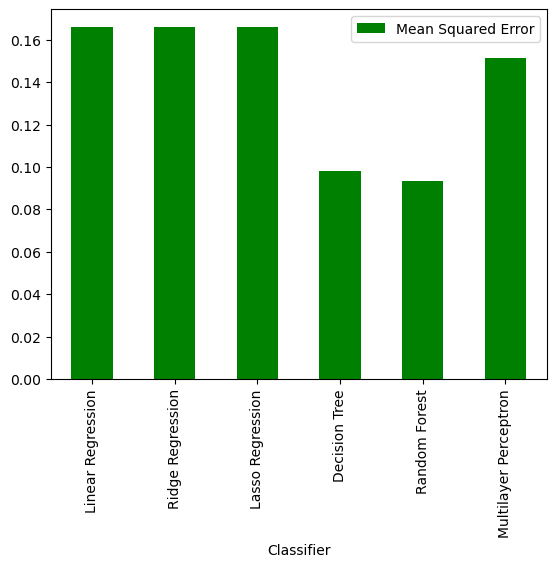

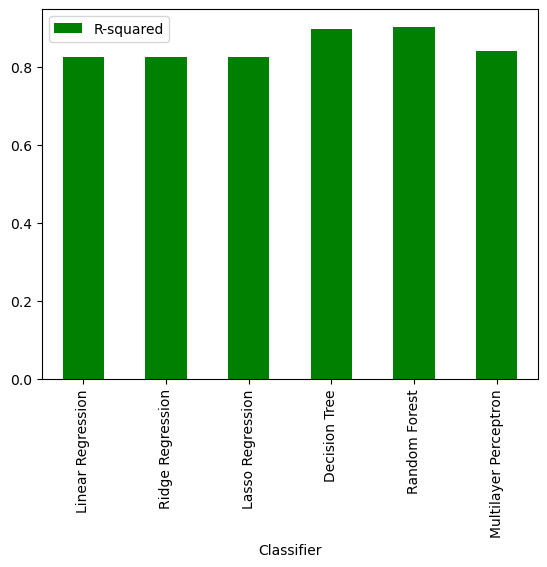

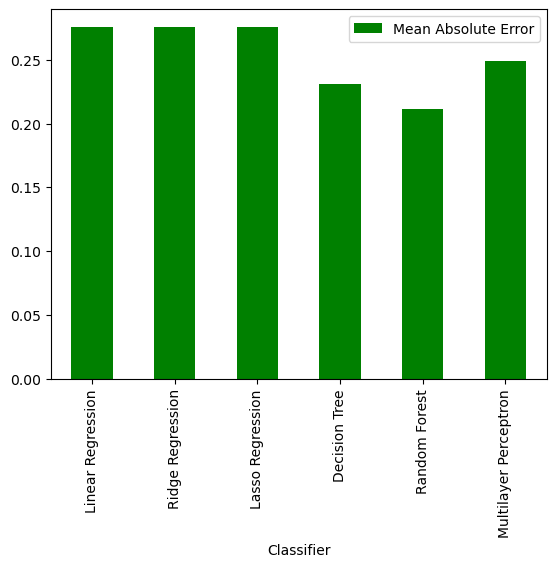

In [ ]:
metrics = {"Mean Squared Error": [MSE_1, MSE_2, MSE_3, MSE_4, MSE_5, MSE_6],
          "R-squared": [R2_1, R2_2, R2_3, R2_4, R2_5, R2_6],
           "Mean Absolute Error": [MAE_1, MAE_2, MAE_3, MAE_4, MAE_5, MAE_6]}
#print(metrics)

table=pd.DataFrame(metrics)

#print(Table_for_metrics)

Classifier=["Linear Regression", "Ridge Regression", "Lasso Regression", "Decision Tree", "Random Forest", "Multilayer Perceptron"]

table["Classifier"]= Classifier

print(table)


#tableTable_for_metrics.Mean Squared Error
#Table_for_metrics.plot(kind='bar', color="green", width = 0.2)

table.plot.bar(x="Classifier", y="Mean Squared Error", color="green")
table.plot.bar(x="Classifier", y="R-squared", color="green")
table.plot.bar(x="Classifier", y="Mean Absolute Error", color="green")

In [ ]:
####################################
####################################
####################################

In [ ]:
##Select best eight features: enginesize, curbweight, horsepower, carwidth, carlength, driverwheel_rwd, wheelbase, boreratio
#print(dataset_scaled)

##features
X=dataset_scaled[["enginesize", "curbweight", "horsepower", "carwidth", "carlength", "drivewheel_rwd", "wheelbase", "boreratio"]]
#print(X)

##the target variable, price
Y=dataset_scaled["price"]
#print(Y)

In [ ]:
random.seed=42

##Split the data into training and test sets
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST= train_test_split(X, Y, test_size=0.3,
                                                   random_state=1)


#print(X_TRAIN)
#print(X_TEST)
#print(Y_TRAIN)
#print(Y_TEST)

In [ ]:
##Create a linear regression model
LR_MODEL = LinearRegression()


##Fit the model to the training data
LR_MODEL.fit(X_TRAIN, Y_TRAIN)

##Make predictions on the test set
PREDICTIONS = LR_MODEL.predict(X_TEST)


##Calculate the mean squared error, R2, mean absolute error
MSE_1 = mean_squared_error(Y_TEST, PREDICTIONS)
R2_1 = LR_MODEL.score(X_TEST, Y_TEST)
MAE_1= mean_absolute_error(Y_TEST, PREDICTIONS)

##Print the coefficients
print("Mean Squared Error: ", MSE_1)
print("R-squared: ", R2_1)
print("Mean Absolute Error: ", MAE_1)

Mean Squared Error:  0.1641096876918511
R-squared:  0.8273551303270601
Mean Absolute Error:  0.2734429172661714


In [ ]:
from sklearn.linear_model import Ridge

random.seed=42

# Create a Ridge regression model. For Ridge model I tried alpha =0.5, 0.05, 0.005, 0.0005 and I got the best results  for 0.00005.
RR_MODEL = Ridge(alpha=0.0005)

# Fit the model to the training data
RR_MODEL.fit(X_TRAIN, Y_TRAIN)

# Make predictions on the test set
PREDICTIONS_RR = RR_MODEL.predict(X_TEST)

# Calculate the mean squared error, R2, mean absolute error
MSE_2 = mean_squared_error(Y_TEST, PREDICTIONS_RR)
R2_2 = RR_MODEL.score(X_TEST, Y_TEST)
MAE_2= mean_absolute_error(Y_TEST, PREDICTIONS_RR)

# Print the coefficients
print("Mean Squared Error: ", MSE_2)
print("R-squared: ", R2_2)
print("Mean Absolute Error: ", MAE_2)

Mean Squared Error:  0.16410946033800328
R-squared:  0.8273553695053559
Mean Absolute Error:  0.273442683906388


In [ ]:

from sklearn.linear_model import Lasso

random.seed=42

# Create a Lasso regression model. For Ridge model I tried alpha =0.5, 0.05, 0.005, 0.0005 and I got the best results  for 0.00005.
LS_MODEL = Lasso(alpha=0.0005, max_iter=100000)

# Fit the model to the training data
LS_MODEL.fit(X_TRAIN, Y_TRAIN)

# Make predictions on the test set
PREDICTIONS_LS = LS_MODEL.predict(X_TEST)

# Calculate the mean squared error, R2, mean absolute error
MSE_3 = mean_squared_error(Y_TEST, PREDICTIONS_LS)
R2_3 = LS_MODEL.score(X_TEST, Y_TEST)
MAE_3 = mean_absolute_error(Y_TEST, PREDICTIONS_LS)

# Print the coefficients
print("Mean Squared Error: ", MSE_3)
print("R-squared: ", R2_3)
print("Mean Absolute Error: ", MAE_3)

Mean Squared Error:  0.1640134144018922
R-squared:  0.8274564106952803
Mean Absolute Error:  0.2734553755166176


In [ ]:
from sklearn.tree import DecisionTreeRegressor

random.seed=42

# Create a desicion tree model. I tried Decision Tree Regressor with max_depth=2, 3, 4, 5, 6,7,8,9 and I got the best results for max_depth=8
DT_MODEL = DecisionTreeRegressor(max_depth=8)

# Fit the model to the training data
DT_MODEL.fit(X_TRAIN, Y_TRAIN)

# Make predictions on the test set
PREDICTIONS_DT = DT_MODEL.predict(X_TEST)

# Calculate the mean squared error, R2, mean absolute error
MSE_4 = mean_squared_error(Y_TEST, PREDICTIONS_DT)
R2_4 = DT_MODEL.score(X_TEST, Y_TEST)
MAE_4= mean_absolute_error(Y_TEST, PREDICTIONS_DT)

# Print the coefficients
print("Mean Squared Error: ", MSE_4)
print("R-squared: ", R2_4)
print("Mean Absolute Error: ", MAE_4)

Mean Squared Error:  0.11332737063661254
R-squared:  0.8807785852918514
Mean Absolute Error:  0.2168039917755891


In [ ]:
from sklearn.ensemble import RandomForestRegressor

random.seed=42

# Create a desicion tree model
RF_MODEL = RandomForestRegressor(n_estimators=100)

# Fit the model to the training data
RF_MODEL.fit(X_TRAIN, Y_TRAIN)

# Make predictions on the test set
PREDICTIONS_RF = RF_MODEL.predict(X_TEST)

# Calculate the mean squared error, R2, mean absolute error
MSE_5 = mean_squared_error(Y_TEST, PREDICTIONS_RF)
R2_5 = RF_MODEL.score(X_TEST, Y_TEST)
MAE_5= mean_absolute_error(Y_TEST, PREDICTIONS_RF)

# Print the coefficients
print("Mean Squared Error: ", MSE_5)
print("R-squared: ", R2_5)
print("Mean Absolute Error: ", MAE_5)

Mean Squared Error:  0.07175226994286868
R-squared:  0.9245159657101749
Mean Absolute Error:  0.17733578234668648


In [ ]:
from sklearn.neural_network import MLPRegressor

random.seed=42

# Create a MLP model
MLP_MODEL = MLPRegressor(hidden_layer_sizes=(10,10), max_iter=10000, alpha=0.0005,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1)

# Fit the model to the training data
MLP_MODEL.fit(X_TRAIN, Y_TRAIN)

# Make predictions on the test set
PREDICTIONS_MLP = MLP_MODEL.predict(X_TEST)

# Calculate the mean squared error, R2, mean absolute error
MSE_6 = mean_squared_error(Y_TEST, PREDICTIONS_MLP)
R2_6 = MLP_MODEL.score(X_TEST, Y_TEST)
MAE_6 = mean_absolute_error(Y_TEST, PREDICTIONS_MLP)

# Print the coefficients
print("Mean Squared Error: ", MSE_6)
print("R-squared: ", R2_6)
print("Mean Absolute Error: ", MAE_6)

Iteration 1, loss = 0.58222865
Iteration 2, loss = 0.57465513
Iteration 3, loss = 0.56410211
Iteration 4, loss = 0.55111578
Iteration 5, loss = 0.53639967
Iteration 6, loss = 0.52041830
Iteration 7, loss = 0.50340868
Iteration 8, loss = 0.48575077
Iteration 9, loss = 0.46778166
Iteration 10, loss = 0.44976319
Iteration 11, loss = 0.43192255
Iteration 12, loss = 0.41443793
Iteration 13, loss = 0.39748217
Iteration 14, loss = 0.38130794
Iteration 15, loss = 0.36593239
Iteration 16, loss = 0.35135761
Iteration 17, loss = 0.33762782
Iteration 18, loss = 0.32476381
Iteration 19, loss = 0.31270547
Iteration 20, loss = 0.30146392
Iteration 21, loss = 0.29093422
Iteration 22, loss = 0.28113599
Iteration 23, loss = 0.27199755
Iteration 24, loss = 0.26352897
Iteration 25, loss = 0.25564900
Iteration 26, loss = 0.24826002
Iteration 27, loss = 0.24138032
Iteration 28, loss = 0.23495334
Iteration 29, loss = 0.22894993
Iteration 30, loss = 0.22328459
Iteration 31, loss = 0.21799149
Iteration 32, los

   Mean Squared Error  R-squared  Mean Absolute Error             Classifier
0            0.164110   0.827355             0.273443      Linear Regression
1            0.164109   0.827355             0.273443       Ridge Regression
2            0.164013   0.827456             0.273455       Lasso Regression
3            0.113327   0.880779             0.216804          Decision Tree
4            0.071752   0.924516             0.177336          Random Forest
5            0.178813   0.811887             0.295211  Multilayer Perceptron


<AxesSubplot:xlabel='Classifier'>

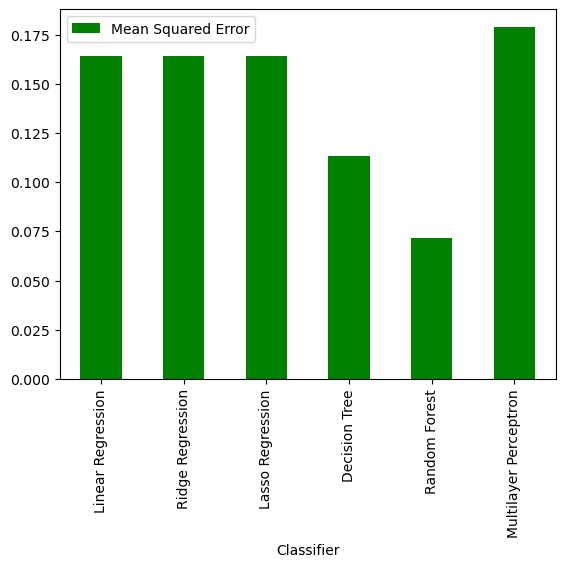

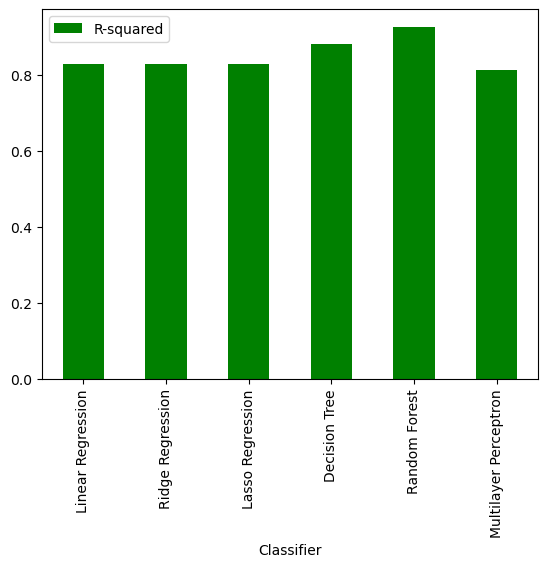

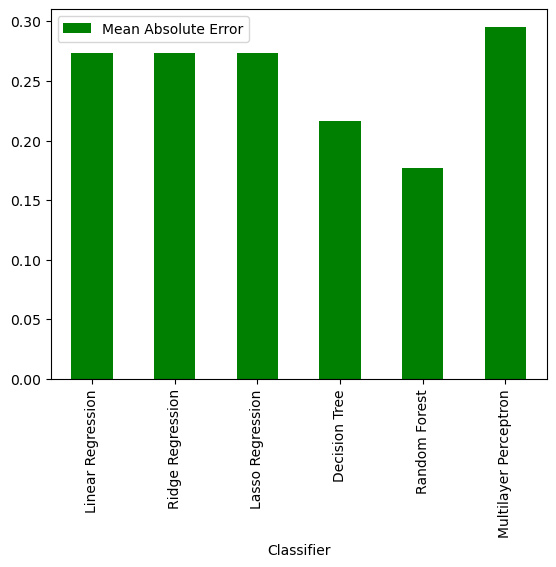

In [ ]:
metrics = {"Mean Squared Error": [MSE_1, MSE_2, MSE_3, MSE_4, MSE_5, MSE_6],
          "R-squared": [R2_1, R2_2, R2_3, R2_4, R2_5, R2_6],
           "Mean Absolute Error": [MAE_1, MAE_2, MAE_3, MAE_4, MAE_5, MAE_6]}
#print(metrics)

table=pd.DataFrame(metrics)

#print(Table_for_metrics)

Classifier=["Linear Regression", "Ridge Regression", "Lasso Regression", "Decision Tree", "Random Forest", "Multilayer Perceptron"]

table["Classifier"]= Classifier

print(table)


#tableTable_for_metrics.Mean Squared Error
#Table_for_metrics.plot(kind='bar', color="green", width = 0.2)

table.plot.bar(x="Classifier", y="Mean Squared Error", color="green")
table.plot.bar(x="Classifier", y="R-squared", color="green")
table.plot.bar(x="Classifier", y="Mean Absolute Error", color="green")